In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter

# H Gate

In [3]:
h_dddqn = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv"
)
h_dddqn_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_H_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv"
)
h_dppo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_PPO_pulse_Discrete.csv"
)
h_dppo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_H_hamiltonian_Field_agent_PPO_pulse_Discrete.csv"
)

h_cppo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_PPO_pulse_Continuous.csv"
)

h_cppo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_H_hamiltonian_Field_agent_PPO_pulse_Continuous.csv"
)

h_dgrpo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_GP_pulse_Discrete.csv"
)

h_dgrpo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_H_hamiltonian_Field_agent_GP_pulse_Discrete.csv"
)

h_cgrpo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_GP_pulse_Continuous.csv"
)

h_cgrpo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_H_hamiltonian_Field_agent_GP_pulse_Continuous.csv"
)

h_td3 = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_H_hamiltonian_Field_agent_TD3_pulse_Continuous.csv"
)

h_td3_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_H_hamiltonian_Field_agent_TD3_pulse_Continuous.csv"
)

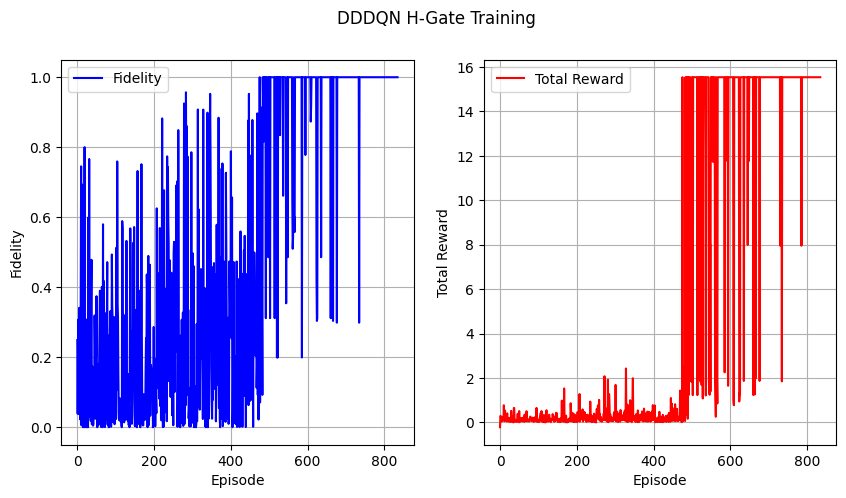

In [4]:
plt.figure(figsize=(10, 5))
plt.suptitle("DDDQN H-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_dddqn["episode"], h_dddqn["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_dddqn["episode"], h_dddqn["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig("/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_DDDQN.png", dpi=300)
plt.show()

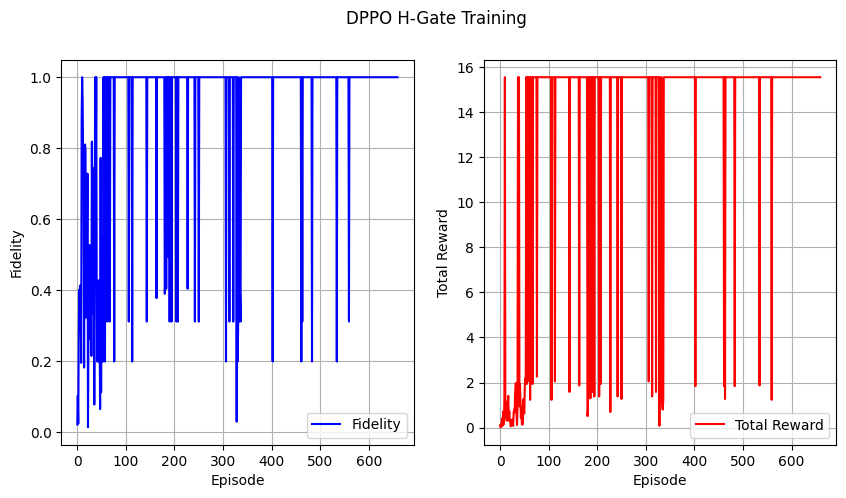

In [5]:
plt.figure(figsize=(10, 5))
plt.suptitle("DPPO H-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_dppo["episode"], h_dppo["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_dppo["episode"], h_dppo["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_DPPO.png", dpi=300
)
plt.show()

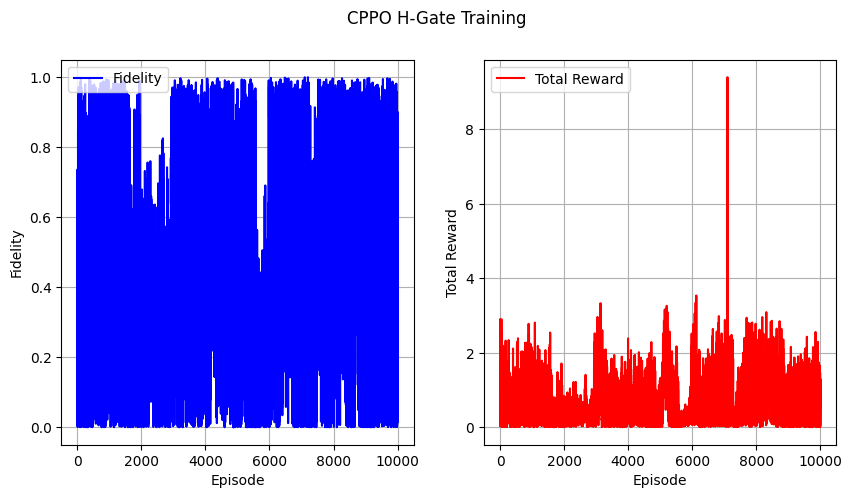

In [6]:
plt.figure(figsize=(10, 5))
plt.suptitle("CPPO H-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_cppo["episode"], h_cppo["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_cppo["episode"], h_cppo["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_CPPO.png", dpi=300
)
plt.show()

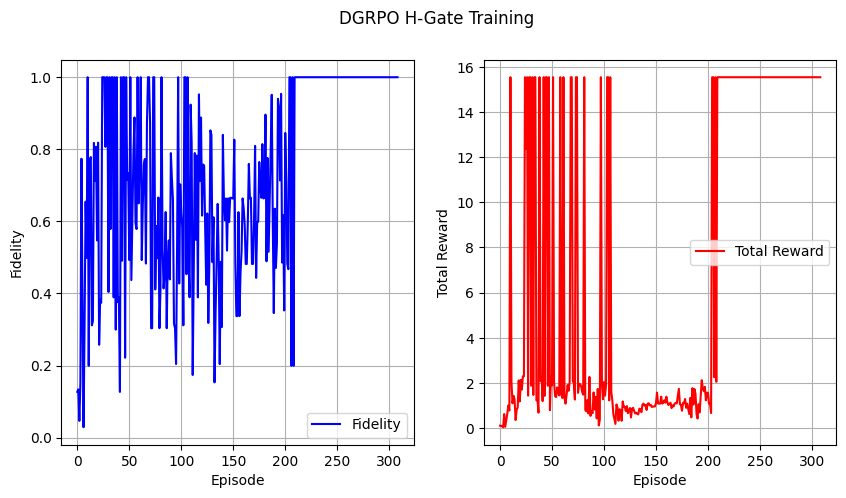

In [7]:
# for GRPO
plt.figure(figsize=(10, 5))
plt.suptitle("DGRPO H-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_dgrpo["episode"], h_dgrpo["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_dgrpo["episode"], h_dgrpo["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_DGRPO.png", dpi=300
)
plt.show()

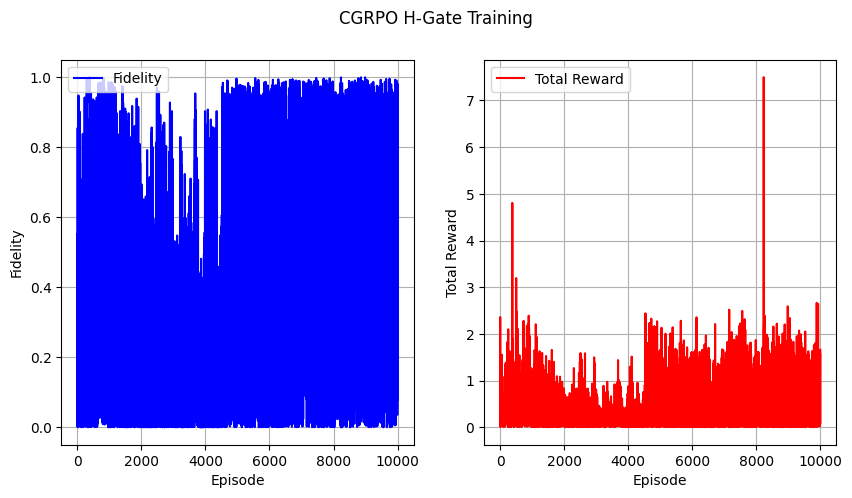

In [8]:
plt.figure(figsize=(10, 5))
plt.suptitle("CGRPO H-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_cgrpo["episode"], h_cgrpo["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_cgrpo["episode"], h_cgrpo["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_CGRPO.png", dpi=300
)
plt.show()

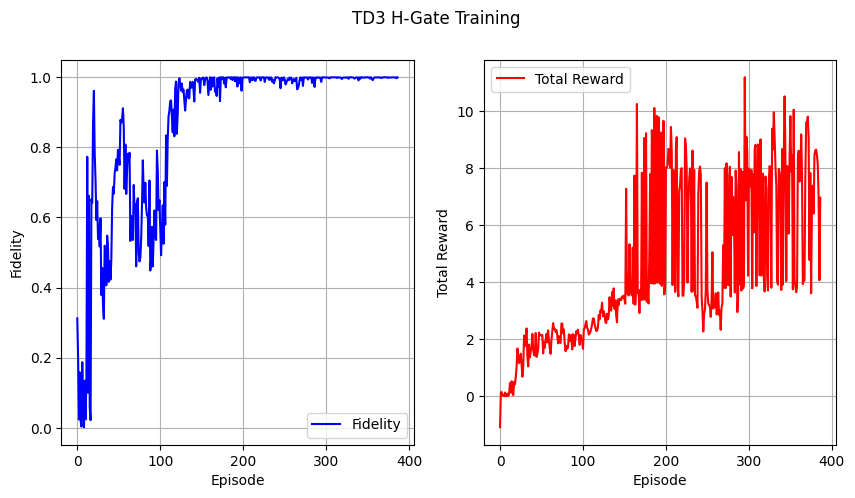

In [9]:
plt.figure(figsize=(10, 5))
plt.suptitle("TD3 H-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(h_td3["episode"], h_td3["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(h_td3["episode"], h_td3["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()   
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Fidelity_Reward_TD3.png", dpi=300
)
plt.show()

In [10]:
# get the 100 rolling mean of log_infidelity, for the first 100 put 0
h_dddqn["log_infidelity_100"] = h_dddqn["log_infidelity"].rolling(100).mean()
h_dddqn["log_infidelity_100"] = h_dddqn["log_infidelity_100"].fillna(0)

h_dppo["log_infidelity_100"] = h_dppo["log_infidelity"].rolling(100).mean()
h_dppo["log_infidelity_100"] = h_dppo["log_infidelity_100"].fillna(0)

h_cppo["log_infidelity_100"] = h_cppo["log_infidelity"].rolling(100).mean()
h_cppo["log_infidelity_100"] = h_cppo["log_infidelity_100"].fillna(0)

h_dgrpo["log_infidelity_100"] = h_dgrpo["log_infidelity"].rolling(100).mean()
h_dgrpo["log_infidelity_100"] = h_dgrpo["log_infidelity_100"].fillna(0)

h_cgrpo["log_infidelity_100"] = h_cgrpo["log_infidelity"].rolling(100).mean()
h_cgrpo["log_infidelity_100"] = h_cgrpo["log_infidelity_100"].fillna(0)

h_td3["log_infidelity_100"] = h_td3["log_infidelity"].rolling(100).mean()
h_td3["log_infidelity_100"] = h_td3["log_infidelity_100"].fillna(0)

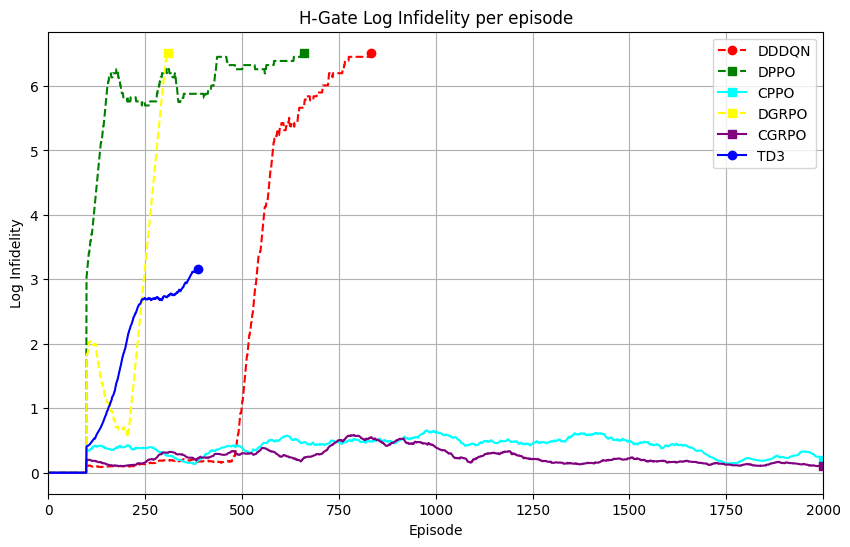

In [11]:
cut = 2000
plt.figure(figsize=(10, 6))
plt.plot(
    h_dddqn["episode"],
    h_dddqn["log_infidelity_100"],
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    h_dppo["episode"][0:cut],
    h_dppo["log_infidelity_100"][0:cut],
    label="DPPO",
    color="green",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    h_cppo["episode"][0:cut],
    h_cppo["log_infidelity_100"][0:cut],
    label="CPPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    h_dgrpo["episode"][0:cut],
    h_dgrpo["log_infidelity_100"][0:cut],
    label="DGRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    h_cgrpo["episode"][0:cut],
    h_cgrpo["log_infidelity_100"][0:cut],
    label="CGRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    h_td3["episode"],
    h_td3["log_infidelity_100"],
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.xlabel("Episode")
plt.ylabel("Log Infidelity")
plt.title("H-Gate Log Infidelity per episode")
plt.legend()
plt.xlim(0, cut)
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Log_Infidelity.png", dpi=300
)
plt.show()

In [12]:
# Extract the max fidelity, log_infidelity and avg_fidelity of every agent for the H gate nad put them in a dataframe
h_max = pd.DataFrame(
    {
        "Agent": ["DDDQN", "DPPO", "CPPO", "DGRPO", "CGRPO", "TD3"],
        "Max Fidelity": [
            h_dddqn["fidelity"].max(),
            h_dppo["fidelity"].max(),
            h_cppo["fidelity"].max(),
            h_dgrpo["fidelity"].max(),
            h_cgrpo["fidelity"].max(),
            h_td3["fidelity"].max(),
        ],
        "Max Log Infidelity": [
            h_dddqn["log_infidelity"].max(),
            h_dppo["log_infidelity"].max(),
            h_cppo["log_infidelity"].max(),
            h_dgrpo["log_infidelity"].max(),
            h_cgrpo["log_infidelity"].max(),
            h_td3["log_infidelity"].max(),
        ],
        "Avg Fidelity": [
            h_dddqn["avg_fidelity"].max(),
            h_dppo["avg_fidelity"].max(),
            h_cppo["avg_fidelity"].max(),
            h_dgrpo["avg_fidelity"].max(),
            h_cgrpo["avg_fidelity"].max(),
            h_td3["avg_fidelity"].max(),
        ],
    }
)
styled_df = h_max.style.background_gradient(
    cmap="inferno", subset=["Max Fidelity", "Max Log Infidelity", "Avg Fidelity"]
)
h_max_sorted = h_max.sort_values(by="Max Log Infidelity", ascending=True)
h_max_sorted.to_latex("/home/pdconte/Desktop/DUTh_Thesis/Tables/H_Gate_Max_Values.tex")
h_max_sorted

,Agent,Max Fidelity,Max Log Infidelity,Avg Fidelity
2,CPPO,0.999502,3.303002,0.999668
4,CGRPO,0.999701,3.524182,0.999801
5,TD3,0.999973,4.568157,0.999982
0,DDDQN,1.000000,6.516003,1.000000
1,DPPO,1.000000,6.516003,1.000000
3,DGRPO,1.000000,6.516003,1.000000


In [13]:
t_min_h_dddqn = f"{h_dddqn['time_step'].idxmin()}"
t_min_h_dppo = f"{h_dppo['time_step'].idxmin()}"
t_min_h_cppo = f"{h_cppo['time_step'].idxmin()}"
t_min_h_dgrpo = f"{h_dgrpo['time_step'].idxmin()}"
t_min_h_cgrpo = f"{h_cgrpo['time_step'].idxmin()}"
t_min_h_td3 = f"{h_td3['time_step'].idxmin()}"

In [14]:
h_log_inf_ep_dddqn = pd.DataFrame(
    ast.literal_eval(h_dddqn_trajectories[t_min_h_dddqn][3])
)
h_log_inf_ep_dppo = pd.DataFrame(ast.literal_eval(h_dppo_trajectories[t_min_h_dppo][3]))
h_log_inf_ep_cppo = pd.DataFrame(ast.literal_eval(h_cppo_trajectories[t_min_h_cppo][3]))
h_log_inf_ep_dgrpo = pd.DataFrame(
    ast.literal_eval(h_dgrpo_trajectories[t_min_h_dgrpo][3])
)
h_log_inf_ep_cgrpo = pd.DataFrame(
    ast.literal_eval(h_cgrpo_trajectories[t_min_h_cgrpo][3])
)
h_log_inf_ep_td3 = pd.DataFrame(ast.literal_eval(h_td3_trajectories[t_min_h_td3][3]))

In [15]:
# # Find the index of the row with the minimum time step
# t_min_h_dddqn = h_dddqn["time_step"].idxmin()

# # Extract all rows that have the minimum time step
# min_time_step_rows = h_dddqn[
#     h_dddqn["time_step"] == h_dddqn.loc[t_min_h_dddqn, "time_step"]
# ]

# # Find the row with the maximum fidelity among the filtered ones
# t_optimal = f"{min_time_step_rows["fidelity"].idxmax()}"

# # Extract the corresponding trajectory data
# h_log_inf_ep_dddqn = pd.DataFrame(ast.literal_eval(h_dddqn_trajectories[t_optimal][3]))

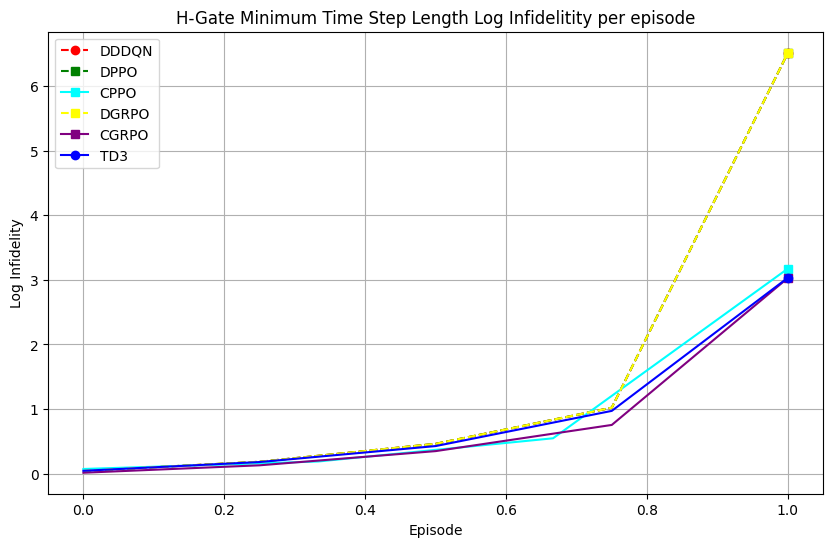

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(
    np.linspace(0, 1, len(h_log_inf_ep_dddqn)),
    h_log_inf_ep_dddqn,
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(h_log_inf_ep_dppo)),
    h_log_inf_ep_dppo,
    label="DPPO",
    color="green",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(h_log_inf_ep_cppo)),
    h_log_inf_ep_cppo,
    label="CPPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(h_log_inf_ep_dgrpo)),
    h_log_inf_ep_dgrpo,
    label="DGRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(h_log_inf_ep_cgrpo)),
    h_log_inf_ep_cgrpo,
    label="CGRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(h_log_inf_ep_td3)),
    h_log_inf_ep_td3,
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.xlabel("Episode")
plt.ylabel("Log Infidelity")
plt.title("H-Gate Minimum Time Step Length Log Infidelitity per episode")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Minimum_Time_Step_Length_Log_Infidelity.png",
)
plt.show()

In [17]:
def _normalize_array(array, label):
    max_val = np.max(np.abs(array))
    if max_val == 0:
        return np.zeros_like(array)
    return array / max_val


def _smooth_array(array, method="none", t_normalized=None, **kwargs):
    if method == "moving_average":
        window_size = kwargs.get("window_size", 5)
        return np.convolve(array, np.ones(window_size) / window_size, mode="same")
    elif method == "gaussian":
        sigma = kwargs.get("sigma", 2)
        return gaussian_filter1d(array, sigma=sigma)
    elif method == "savitzky_golay":
        window_length = kwargs.get("window_length", 9)
        polyorder = kwargs.get("polyorder", 3)
        return savgol_filter(array, window_length=window_length, polyorder=polyorder)
    elif method == "cubic_spline" and t_normalized is not None:
        t_smooth = np.linspace(0, 1, 500)
        spline = CubicSpline(t_normalized, array)
        return spline(t_smooth), t_smooth
    return array


# Single-Qubit Plot
def plot_control_pulse(
    rabi,
    detuning,
    gate,
    agent_type,
    smoothing_method="none",
    **kwargs,
):
    # Ensure input arrays are compatible
    assert len(rabi) == len(
        detuning
    ), "Rabi and detuning arrays must have the same length."

    num_steps = len(rabi)
    t_normalized = np.linspace(0, 1, num_steps)

    # Normalize Rabi and Detuning
    rabi_normalized = _normalize_array(rabi, "Rabi")
    detuning_normalized = _normalize_array(detuning, "Detuning")

    # Apply smoothing
    if smoothing_method == "cubic_spline":
        rabi_normalized, t_normalized = _smooth_array(
            rabi_normalized, smoothing_method, t_normalized, **kwargs
        )
        detuning_normalized, t_normalized = _smooth_array(
            detuning_normalized, smoothing_method, t_normalized, **kwargs
        )
    else:
        rabi_normalized = _smooth_array(rabi_normalized, smoothing_method, **kwargs)
        detuning_normalized = _smooth_array(
            detuning_normalized, smoothing_method, **kwargs
        )

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(
        t_normalized,
        rabi_normalized,
        label=r"$\frac{\mathrm{\Omega}}{\mathrm{\Omega}_{\mathrm{max}}}$",
        color="blue",
        linestyle="--",
        drawstyle="steps-post",
    )
    plt.plot(
        t_normalized,
        detuning_normalized,
        label=r"$\frac{\Delta}{\Delta_{\mathrm{max}}}$",
        color="red",
        linestyle="--",
        drawstyle="steps-post",
    )
    plt.xlabel(r"$\frac{t}{T}$", fontsize=14)
    plt.ylabel("Normalized Control Pulses", fontsize=14)
    plt.title(f"{agent_type} {gate} Gate Control Pulses", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(
        f"/home/pdconte/Desktop/DUTh_Thesis/Plots/{gate}_Gate_Control_{agent_type}.png", dpi=300
    )
    plt.show()

In [18]:
# Apply the function to the column
h_dddqn_pulse =  ast.literal_eval(h_dddqn_trajectories[t_min_h_dddqn][6])
h_dddqn_pulse = {
    "omega": [d["omega"] for d in h_dddqn_pulse],
    "delta": [d["delta"] for d in h_dddqn_pulse],
}

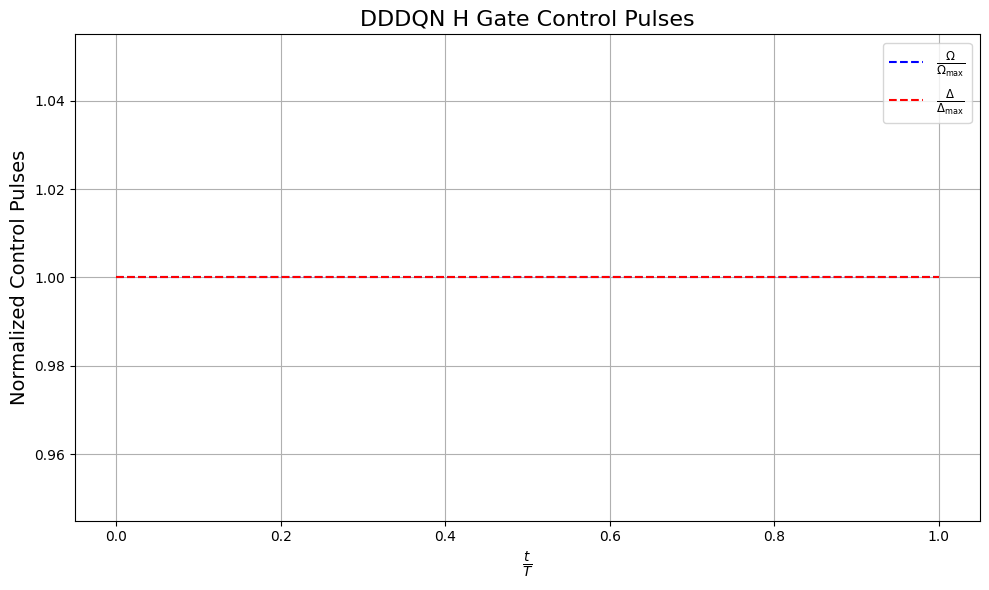

In [19]:
plot_control_pulse(
    h_dddqn_pulse["omega"],
    h_dddqn_pulse["delta"],
    "H",
    "DDDQN",
    smoothing_method="gaussian",
)

In [20]:
h_dppo_pulse = ast.literal_eval(h_dppo_trajectories[t_min_h_dppo][6])
h_dppo_pulse = {
    "omega": [d["omega"] for d in h_dppo_pulse],
    "delta": [d["delta"] for d in h_dppo_pulse],
}

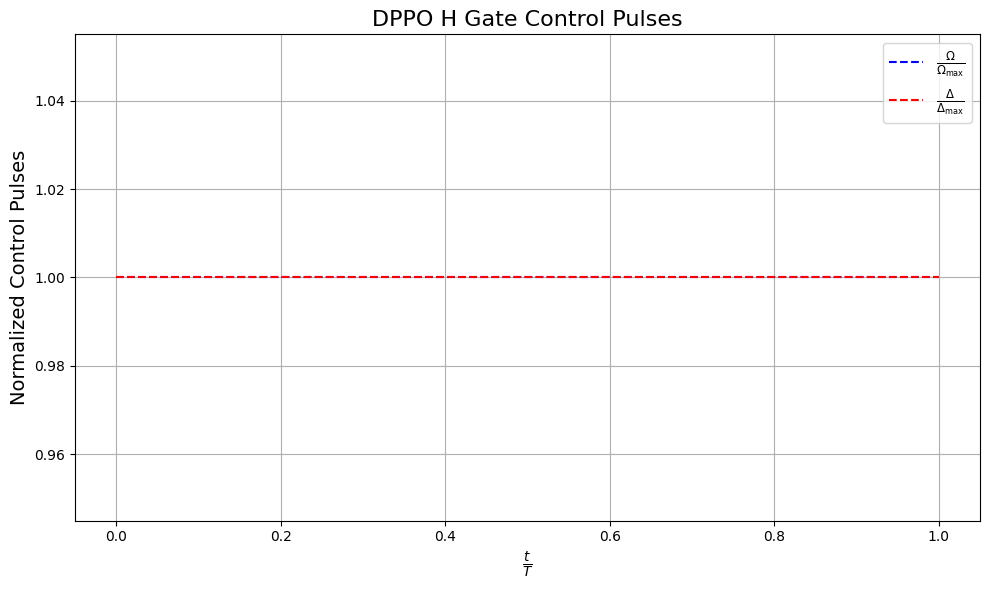

In [21]:
plot_control_pulse(
    h_dppo_pulse["omega"],
    h_dppo_pulse["delta"],
    "H",
    "DPPO",
    smoothing_method="gaussian",
)

In [22]:
h_cppo_pulse = ast.literal_eval(h_cppo_trajectories[t_min_h_cppo][6])
h_cppo_pulse = {
    "omega": [d["omega"] for d in h_cppo_pulse],
    "delta": [d["delta"] for d in h_cppo_pulse],
}

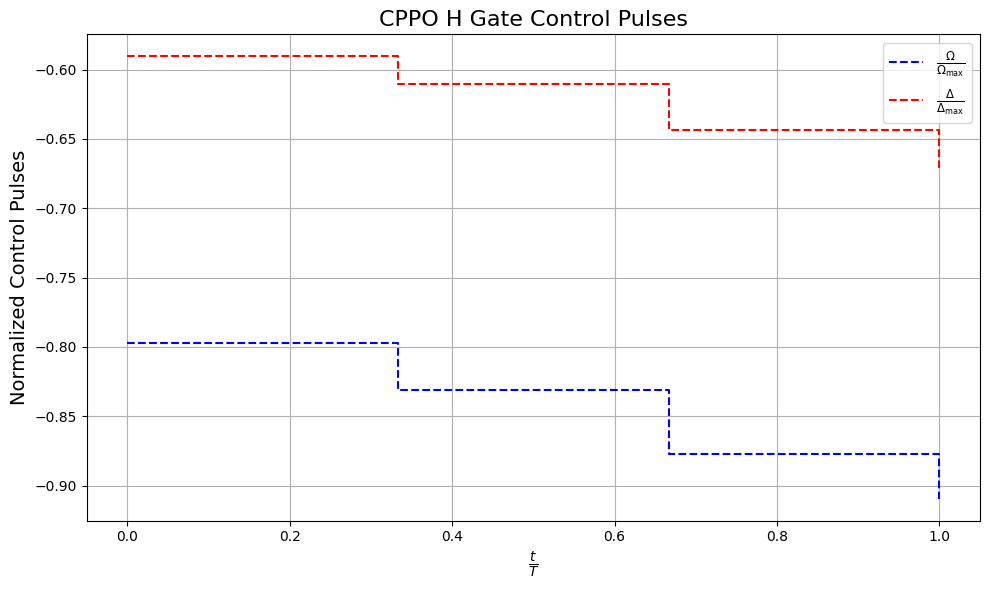

In [23]:
plot_control_pulse(
    h_cppo_pulse["omega"],
    h_cppo_pulse["delta"],
    "H",
    "CPPO",
    smoothing_method="gaussian",
)

In [24]:
h_dgrpo_pulse = ast.literal_eval(h_dgrpo_trajectories[t_min_h_dgrpo][6])
h_dgrpo_pulse = {
    "omega": [d["omega"] for d in h_dgrpo_pulse],
    "delta": [d["delta"] for d in h_dgrpo_pulse],
}

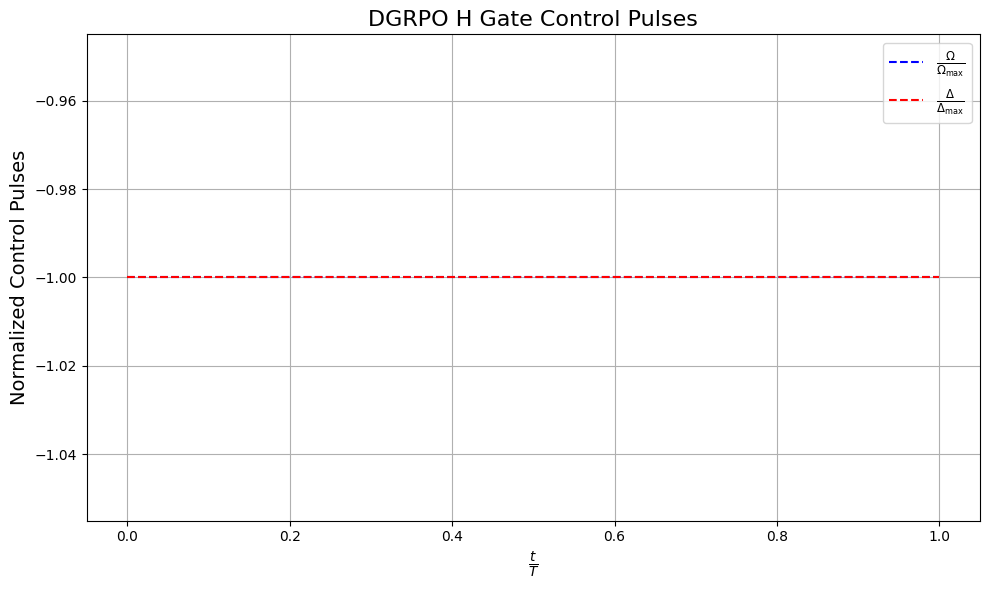

In [25]:
plot_control_pulse(
    h_dgrpo_pulse["omega"],
    h_dgrpo_pulse["delta"],
    "H",
    "DGRPO",
    smoothing_method="gaussian",
)

In [26]:
h_cgrpo_pulse = ast.literal_eval(h_cgrpo_trajectories[t_min_h_cgrpo][6])
h_cgrpo_pulse = {
    "omega": [d["omega"] for d in h_cgrpo_pulse],
    "delta": [d["delta"] for d in h_cgrpo_pulse],
}

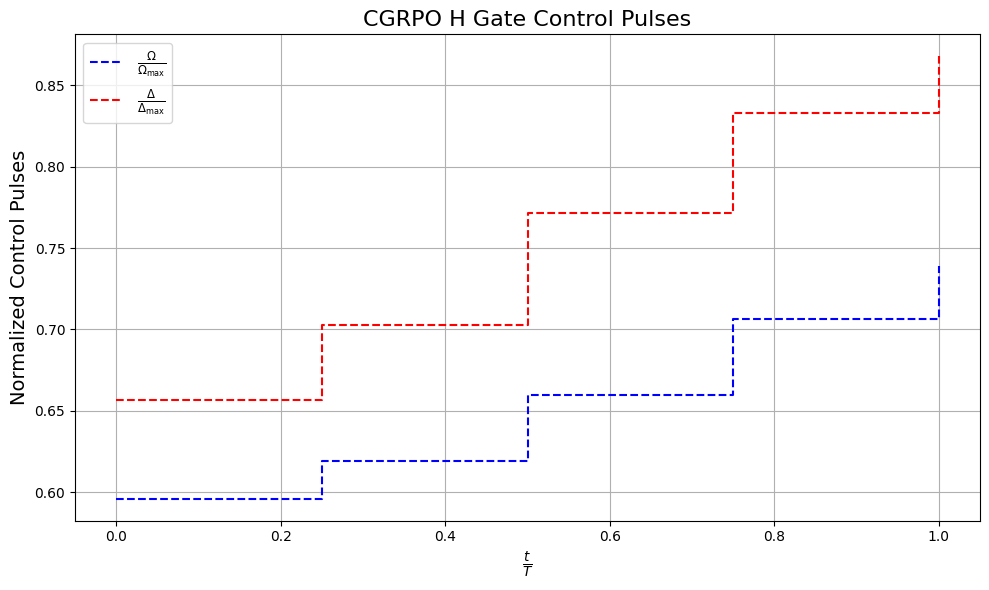

In [27]:
plot_control_pulse(
    h_cgrpo_pulse["omega"],
    h_cgrpo_pulse["delta"],
    "H",
    "CGRPO",
    smoothing_method="gaussian",
)

In [28]:
h_td3_pulse = ast.literal_eval(h_cgrpo_trajectories[t_min_h_td3][6])
h_td3_pulse = {
    "omega": [d["omega"] for d in h_td3_pulse],
    "delta": [d["delta"] for d in h_td3_pulse],
}

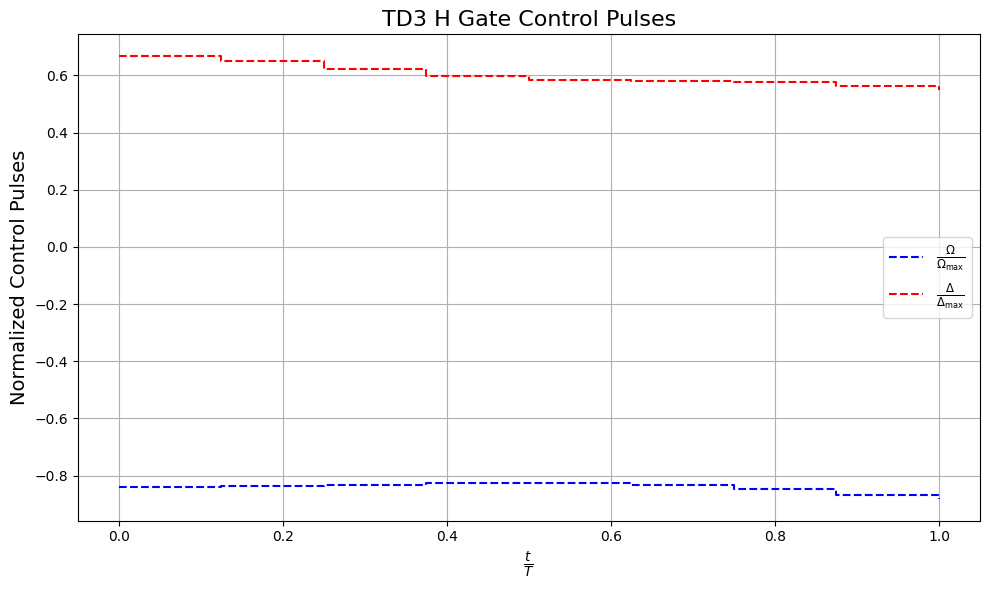

In [29]:
plot_control_pulse(
    h_td3_pulse["omega"],
    h_td3_pulse["delta"],
    "H",
    "TD3",
    smoothing_method="gaussian",
)

# T-Gate

In [30]:
# import the same for T as H
t_dddqn = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv"
)
t_dddqn_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_T_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv"
)
t_dppo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_PPO_pulse_Discrete.csv"
)

t_dppo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_T_hamiltonian_Field_agent_PPO_pulse_Discrete.csv"
)

t_cppo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_PPO_pulse_Continuous.csv"
)

t_cppo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_T_hamiltonian_Field_agent_PPO_pulse_Continuous.csv"
)

t_dgrpo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_GP_pulse_Discrete.csv"
)

t_dgrpo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_T_hamiltonian_Field_agent_GP_pulse_Discrete.csv"
)

t_cgrpo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_GP_pulse_Continuous.csv"
)

t_cgrpo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_T_hamiltonian_Field_agent_GP_pulse_Continuous.csv"
)

t_td3 = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_T_hamiltonian_Field_agent_TD3_pulse_Continuous.csv"
)

t_td3_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_T_hamiltonian_Field_agent_TD3_pulse_Continuous.csv"
)

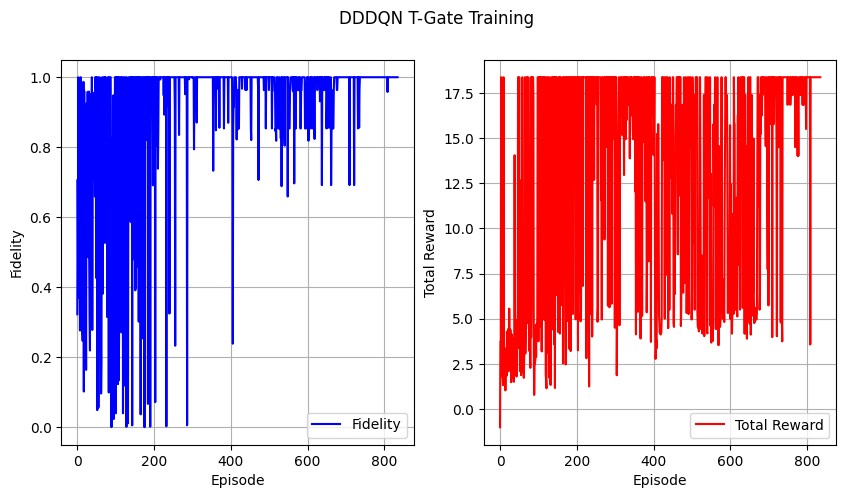

In [31]:
plt.figure(figsize=(10, 5))
plt.suptitle("DDDQN T-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(t_dddqn["episode"], t_dddqn["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t_dddqn["episode"], t_dddqn["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_DDDQN.png", dpi=300
)
plt.show()

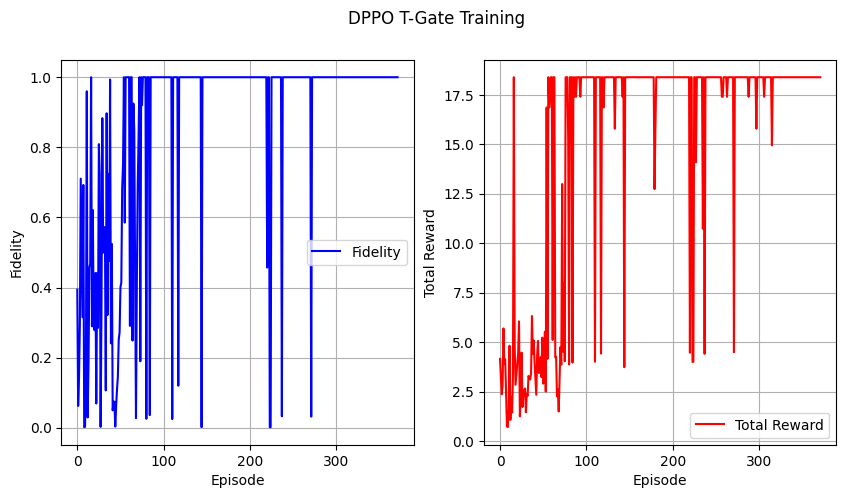

In [32]:
plt.figure(figsize=(10, 5))
plt.suptitle("DPPO T-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(t_dppo["episode"], t_dppo["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t_dppo["episode"], t_dppo["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_DPPO.png", dpi=300
)
plt.show()

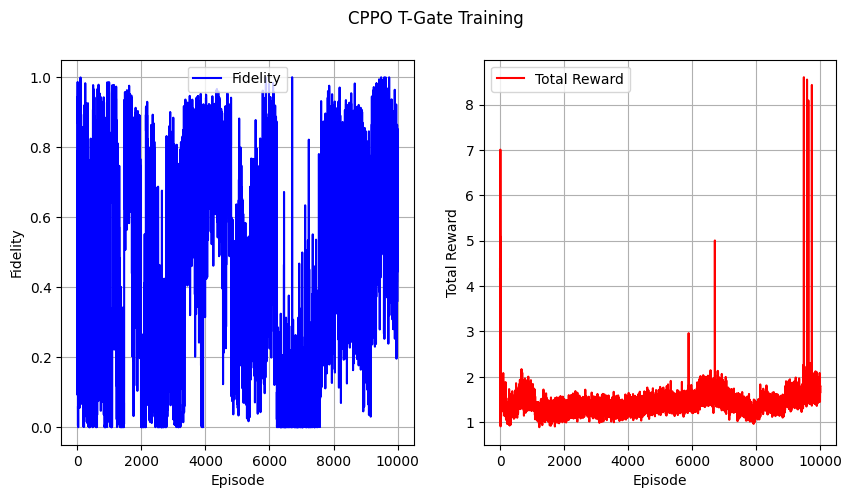

In [33]:
plt.figure(figsize=(10, 5))
plt.suptitle("CPPO T-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(t_cppo["episode"], t_cppo["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t_cppo["episode"], t_cppo["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_CPPO.png", dpi=300
)
plt.show()

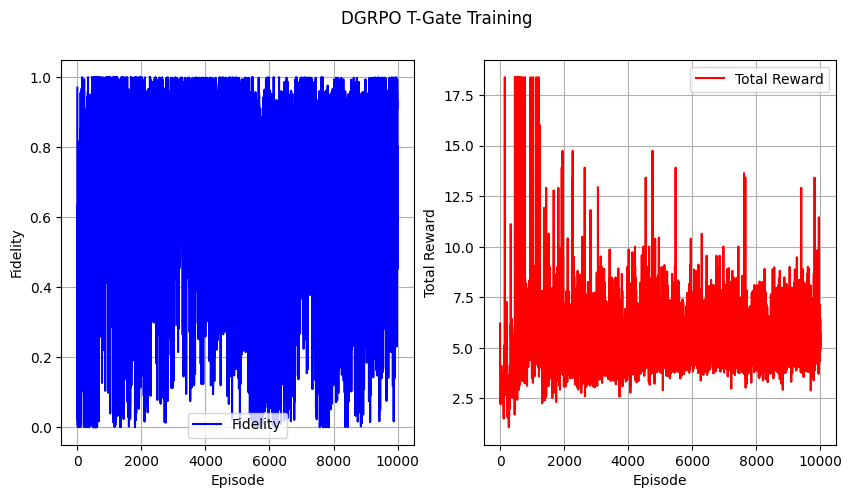

In [34]:
# for GRPO
plt.figure(figsize=(10, 5))
plt.suptitle("DGRPO T-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(t_dgrpo["episode"], t_dgrpo["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t_dgrpo["episode"], t_dgrpo["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")   
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_DGRPO.png", dpi=300
)
plt.show()

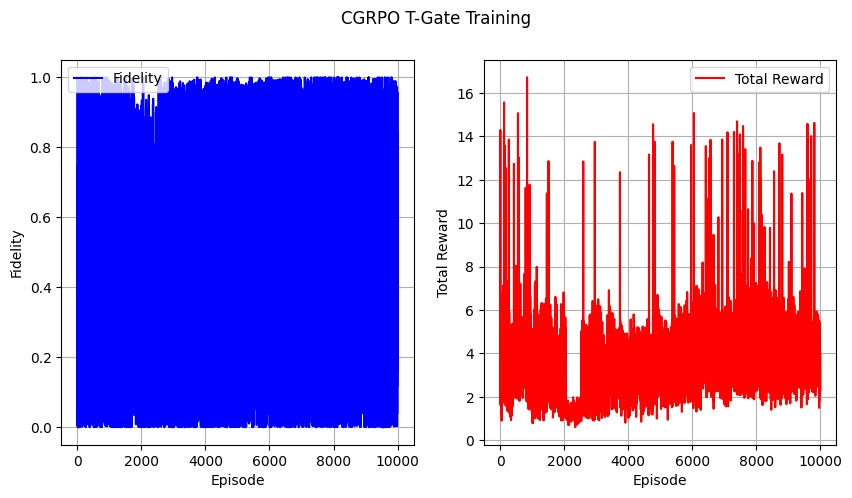

In [35]:
plt.figure(figsize=(10, 5))
plt.suptitle("CGRPO T-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(t_cgrpo["episode"], t_cgrpo["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t_cgrpo["episode"], t_cgrpo["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_CGRPO.png", dpi=300
)
plt.show()

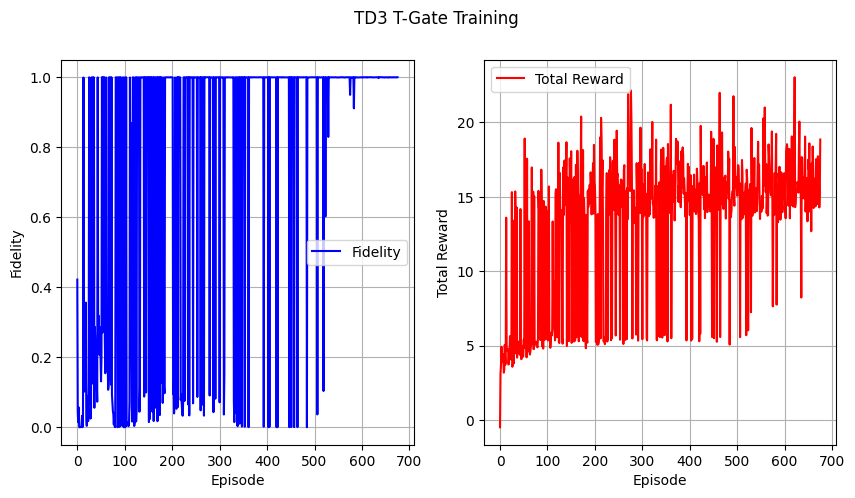

In [36]:
plt.figure(figsize=(10, 5))
plt.suptitle("TD3 T-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(t_td3["episode"], t_td3["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t_td3["episode"], t_td3["total_reward"], color="red", label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()   
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Fidelity_Reward_TD3.png", dpi=300
)
plt.show()

In [37]:
t_max = pd.DataFrame(
    {
        "Agent": ["DDDQN", "PPO-D", "PPO-C", "GRPO-D", "GRPO-C", "TD3"],
        "Max Fidelity": [
            t_dddqn["fidelity"].max(),
            t_dppo["fidelity"].max(),
            t_cppo["fidelity"].max(),
            t_dgrpo["fidelity"].max(),
            t_cgrpo["fidelity"].max(),
            t_td3["fidelity"].max(),
        ],
        "Max Log Infidelity": [
            t_dddqn["log_infidelity"].max(),
            t_dppo["log_infidelity"].max(),
            t_cppo["log_infidelity"].max(),
            t_dgrpo["log_infidelity"].max(),
            t_cgrpo["log_infidelity"].max(),
            t_td3["log_infidelity"].max(),
        ],
        "Avg Fidelity": [
            t_dddqn["avg_fidelity"].max(),
            t_dppo["avg_fidelity"].max(),
            t_cppo["avg_fidelity"].max(),
            t_dgrpo["avg_fidelity"].max(),
            t_cgrpo["avg_fidelity"].max(),
            t_td3["avg_fidelity"].max(),
        ],
    }
)
t_max_sorted = t_max.sort_values(by="Max Log Infidelity", ascending=True)
t_max_sorted.to_latex("/home/pdconte/Desktop/DUTh_Thesis/Tables/T_Gate_Max_Values.tex")
t_max_sorted

,Agent,Max Fidelity,Max Log Infidelity,Avg Fidelity
2,PPO-C,0.999617,3.416844,0.999745
0,DDDQN,0.999947,4.273253,0.999964
1,PPO-D,0.999947,4.273253,0.999964
3,GRPO-D,0.999947,4.273253,0.999964
5,TD3,0.999996,5.444416,0.999998
4,GRPO-C,0.999997,5.534479,0.999998


In [38]:
# get the 100 rolling mean of log_infidelity, for the first 100 put 0
t_dddqn["log_infidelity_100"] = t_dddqn["log_infidelity"].rolling(100).mean()
t_dddqn["log_infidelity_100"] = t_dddqn["log_infidelity_100"].fillna(0)

t_dppo["log_infidelity_100"] = t_dppo["log_infidelity"].rolling(100).mean()
t_dppo["log_infidelity_100"] = t_dppo["log_infidelity_100"].fillna(0)

t_cppo["log_infidelity_100"] = t_cppo["log_infidelity"].rolling(100).mean()
t_cppo["log_infidelity_100"] = t_cppo["log_infidelity_100"].fillna(0)

t_dgrpo["log_infidelity_100"] = t_dgrpo["log_infidelity"].rolling(100).mean()
t_dgrpo["log_infidelity_100"] = t_dgrpo["log_infidelity_100"].fillna(0)

t_cgrpo["log_infidelity_100"] = t_cgrpo["log_infidelity"].rolling(100).mean()
t_cgrpo["log_infidelity_100"] = t_cgrpo["log_infidelity_100"].fillna(0)

t_td3["log_infidelity_100"] = t_td3["log_infidelity"].rolling(100).mean()
t_td3["log_infidelity_100"] = t_td3["log_infidelity_100"].fillna(0)

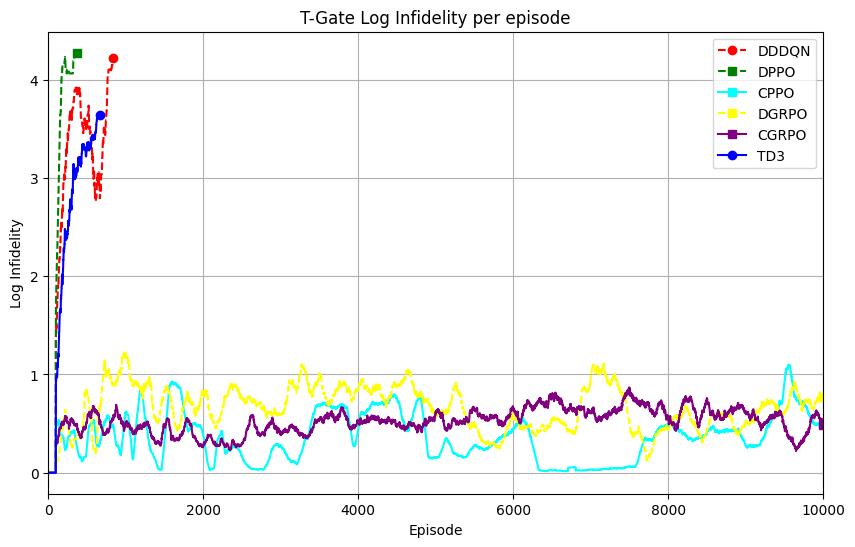

In [39]:
cut = 10000
plt.figure(figsize=(10, 6))
plt.plot(
    t_dddqn["episode"],
    t_dddqn["log_infidelity_100"],
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    t_dppo["episode"][0:cut],
    t_dppo["log_infidelity_100"][0:cut],
    label="DPPO",
    color="green",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    t_cppo["episode"][0:cut],
    t_cppo["log_infidelity_100"][0:cut],
    label="CPPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    t_dgrpo["episode"][0:cut],
    t_dgrpo["log_infidelity_100"][0:cut],
    label="DGRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    t_cgrpo["episode"][0:cut],
    t_cgrpo["log_infidelity_100"][0:cut],
    label="CGRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    t_td3["episode"],
    t_td3["log_infidelity_100"],
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.xlabel("Episode")
plt.ylabel("Log Infidelity")
plt.title("T-Gate Log Infidelity per episode")
plt.legend()
plt.xlim(0, cut)
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Log_Infidelity.png", dpi=300
)
plt.show()

In [112]:
t_min_t_dddqn = f"{t_dddqn['time_step'].idxmin()}"
t_min_t_dppo = f"{t_dppo['time_step'].idxmin()}"
t_min_t_cppo = f"{t_cppo['time_step'].idxmin()}"
t_min_t_dgrpo = f"{t_dgrpo['time_step'].idxmin()}"
t_min_t_cgrpo = f"{t_cgrpo['time_step'].idxmin()}"
#t_min_t_cgrpo = f"7131"
t_min_t_td3 = f"{t_td3['time_step'].idxmin()}"

In [ ]:
#t_cgrpo[t_cgrpo['time_step'] == 2]['fidelity']

10      0.999305
126     0.999756
139     0.999245
561     0.999665
844     0.999874
5965    0.999194
6055    0.999613
6938    0.999406
7103    0.999354
7489    0.999236
8723    0.999281
9714    0.999328
Name: fidelity, dtype: float64

In [113]:
t_log_inf_ep_dddqn = pd.DataFrame(
    ast.literal_eval(t_dddqn_trajectories[t_min_t_dddqn][3])
)
t_log_inf_ep_dppo = pd.DataFrame(ast.literal_eval(t_dppo_trajectories[t_min_t_dppo][3]))
t_log_inf_ep_cppo = pd.DataFrame(ast.literal_eval(t_cppo_trajectories[t_min_t_cppo][3]))
t_log_inf_ep_dgrpo = pd.DataFrame(
    ast.literal_eval(t_dgrpo_trajectories[t_min_t_dgrpo][3])
)
t_log_inf_ep_cgrpo = pd.DataFrame(
    ast.literal_eval(t_cgrpo_trajectories[t_min_t_cgrpo][3])
)
t_log_inf_ep_td3 = pd.DataFrame(ast.literal_eval(t_td3_trajectories[t_min_t_td3][3]))

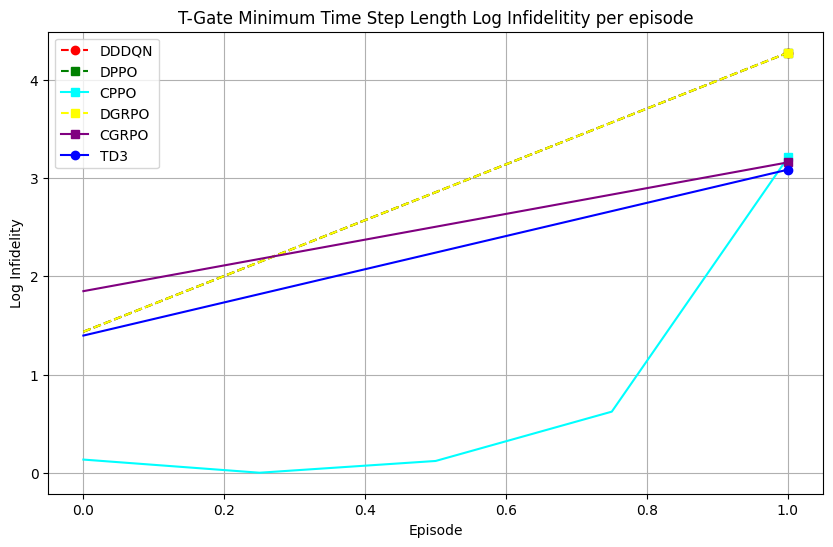

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(
    np.linspace(0, 1, len(t_log_inf_ep_dddqn)),
    t_log_inf_ep_dddqn,
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(t_log_inf_ep_dppo)),
    t_log_inf_ep_dppo,
    label="DPPO",
    color="green",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(t_log_inf_ep_cppo)),
    t_log_inf_ep_cppo,
    label="CPPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(t_log_inf_ep_dgrpo)),
    t_log_inf_ep_dgrpo,
    label="DGRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(t_log_inf_ep_cgrpo)),
    t_log_inf_ep_cgrpo,
    label="CGRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    np.linspace(0, 1, len(t_log_inf_ep_td3)),
    t_log_inf_ep_td3,
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.xlabel("Episode")
plt.ylabel("Log Infidelity")
plt.title("T-Gate Minimum Time Step Length Log Infidelitity per episode")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_gate_Minimum_Time_Step_Length_Log_Infidelity.png",
    dpi=300,
)
plt.show()

In [44]:
# Apply the function to the column
t_dddqn_pulse = ast.literal_eval(t_dddqn_trajectories[t_min_t_dddqn][6])

In [45]:
t_dddqn_pulse = {
    "omega": [d["omega"] for d in t_dddqn_pulse],
    "delta": [d["delta"] for d in t_dddqn_pulse],
}

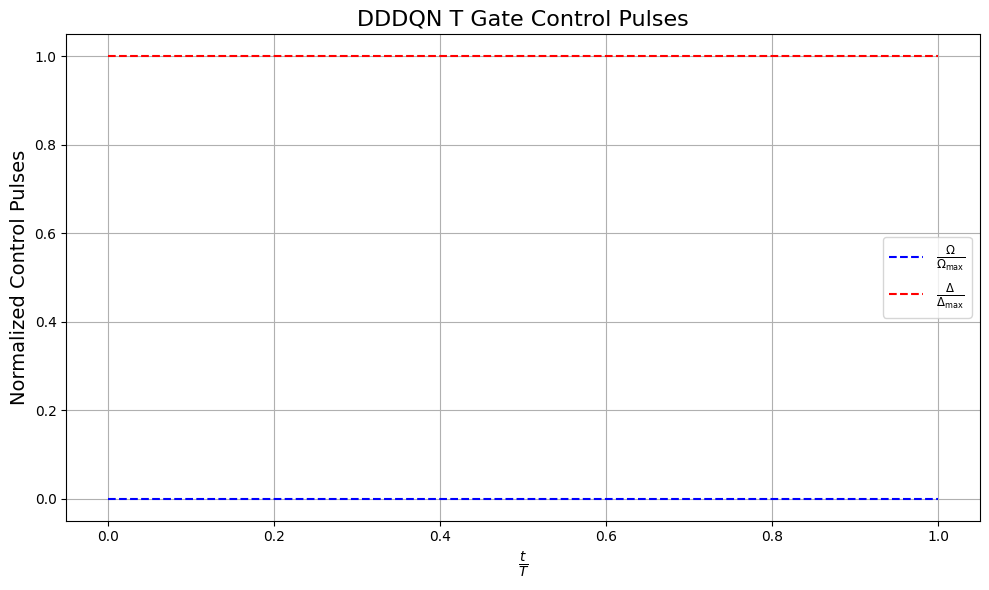

In [46]:
plot_control_pulse(
    t_dddqn_pulse["omega"],
    t_dddqn_pulse["delta"],
    "T",
    "DDDQN",
    smoothing_method="gaussian",
)

In [47]:
t_dppo_pulse = ast.literal_eval(t_dppo_trajectories[t_min_t_dppo][6])
t_dppo_pulse = {
    "omega": [d["omega"] for d in t_dppo_pulse],
    "delta": [d["delta"] for d in t_dppo_pulse],
}

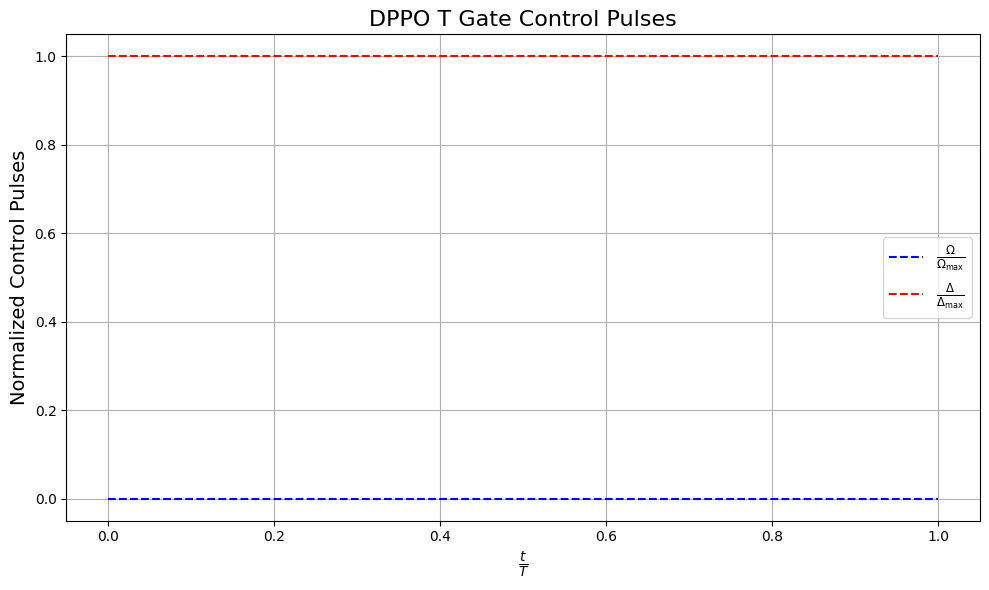

In [48]:
plot_control_pulse(
    t_dppo_pulse["omega"],
    t_dppo_pulse["delta"],
    "T",
    "DPPO",
    smoothing_method="gaussian",
)

In [49]:
t_cppo_pulse = ast.literal_eval(t_cppo_trajectories[t_min_t_cppo][6])
t_cppo_pulse = {
    "omega": [d["omega"] for d in t_cppo_pulse],
    "delta": [d["delta"] for d in t_cppo_pulse],
}

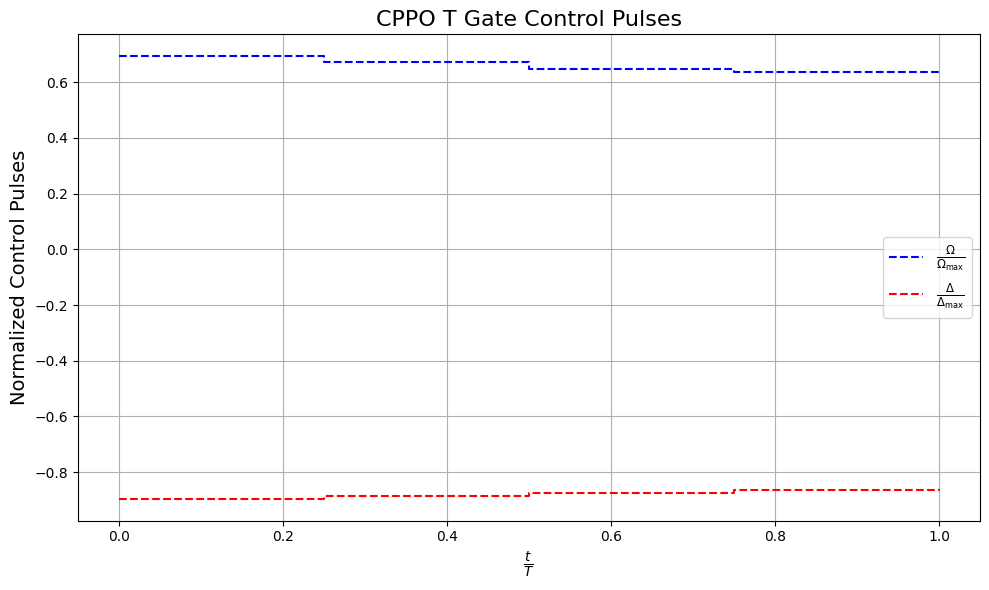

In [50]:
plot_control_pulse(
    t_cppo_pulse["omega"],
    t_cppo_pulse["delta"],
    "T",
    "CPPO",
    smoothing_method="gaussian",
)

In [51]:
t_dgrpo_pulse = ast.literal_eval(t_dgrpo_trajectories[t_min_t_dgrpo][6])
t_dgrpo_pulse = {
    "omega": [d["omega"] for d in t_dgrpo_pulse],
    "delta": [d["delta"] for d in t_dgrpo_pulse],
}

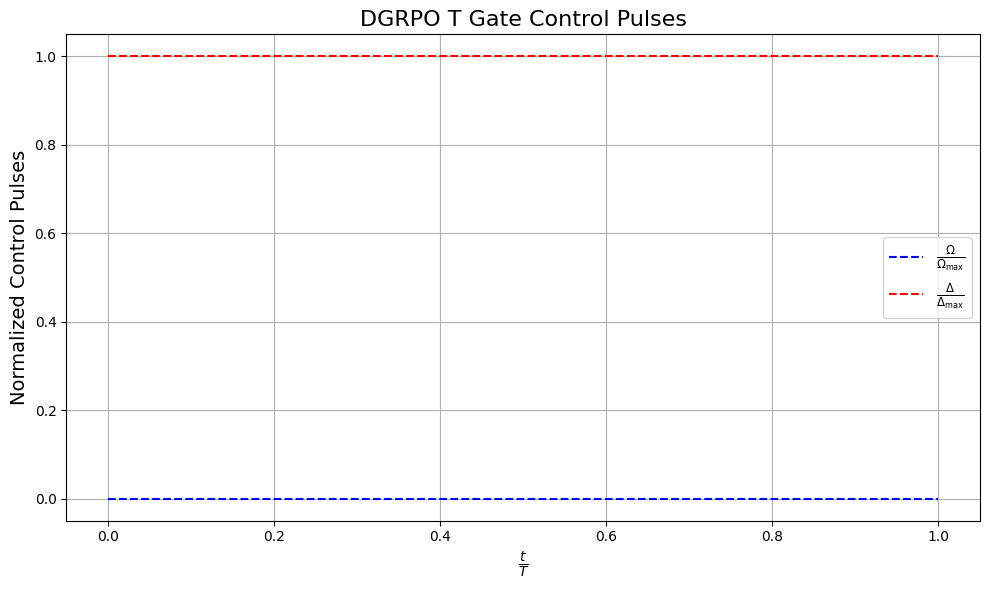

In [52]:
plot_control_pulse(
    t_dgrpo_pulse["omega"],
    t_dgrpo_pulse["delta"],
    "T",
    "DGRPO",
    smoothing_method="gaussian",
)

In [115]:
t_cgrpo_pulse = ast.literal_eval(t_cgrpo_trajectories[t_min_t_cgrpo][6])
t_cgrpo_pulse = {
    "omega": [d["omega"] for d in t_cgrpo_pulse],
    "delta": [d["delta"] for d in t_cgrpo_pulse],
}

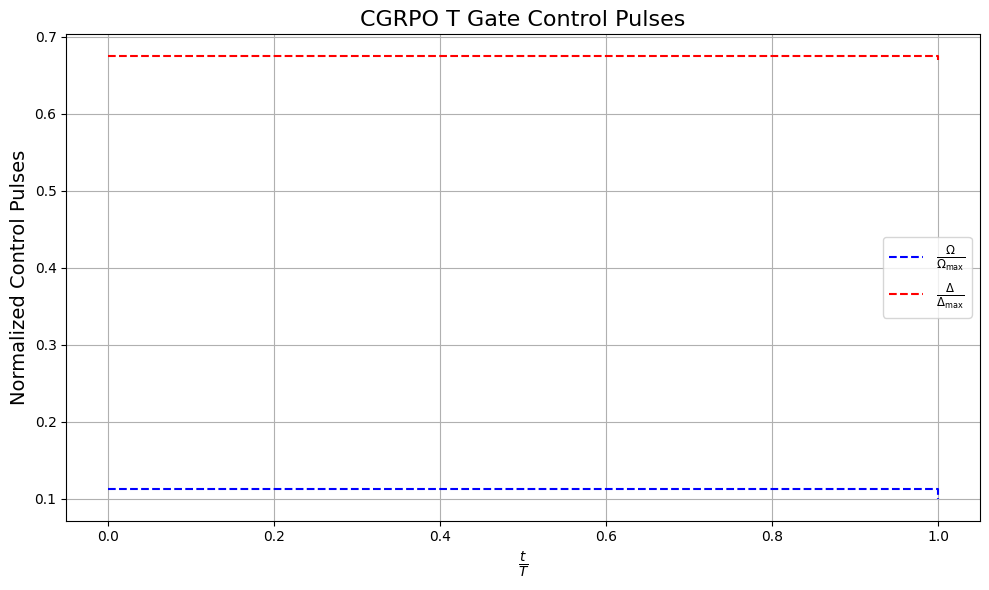

In [116]:
plot_control_pulse(
    t_cgrpo_pulse["omega"],
    t_cgrpo_pulse["delta"],
    "T",
    "CGRPO",
    smoothing_method="gaussian",
)

In [55]:
t_td3_pulse = ast.literal_eval(t_cgrpo_trajectories[t_min_t_td3][6])
t_td3_pulse = {
    "omega": [d["omega"] for d in t_td3_pulse],
    "delta": [d["delta"] for d in t_td3_pulse],
}

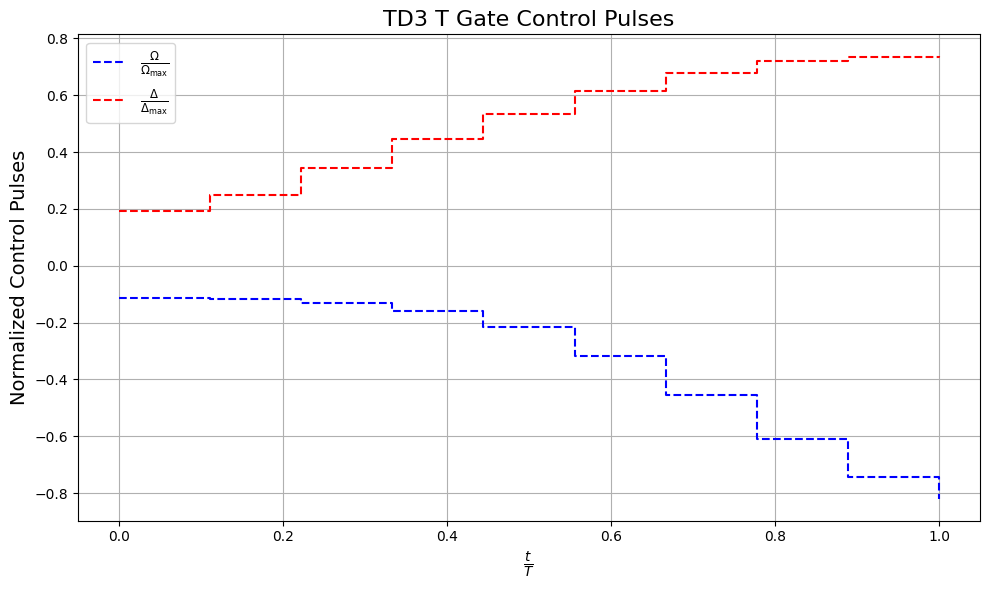

In [56]:
plot_control_pulse(
    t_td3_pulse["omega"],
    t_td3_pulse["delta"],
    "T",
    "TD3",
    smoothing_method="gaussian",
)

# CNOT

In [57]:
cnot_dddqn = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv"
)
cnot_dddqn_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_CNOT_hamiltonian_Field_agent_DDDQN_pulse_Discrete.csv"
)
cnot_dppo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_PPO_pulse_Discrete.csv"
)
cnot_dppo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_CNOT_hamiltonian_Field_agent_PPO_pulse_Discrete.csv"
)
cnot_cppo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_PPO_pulse_Continuous.csv"
)
cnot_cppo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_CNOT_hamiltonian_Field_agent_PPO_pulse_Continuous.csv"
)
cnot_dgrpo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_GP_pulse_Discrete.csv"
)
cnot_dgrpo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_CNOT_hamiltonian_Field_agent_GP_pulse_Discrete.csv"
)
cnot_cgrpo = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_GP_pulse_Continuous.csv"
)
cnot_cgrpo_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_CNOT_hamiltonian_Field_agent_GP_pulse_Continuous.csv"
)
cnot_td3 = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/training_metrics_gate_CNOT_hamiltonian_Field_agent_TD3_pulse_Continuous.csv"
)
cnot_td3_trajectories = pd.read_csv(
    "/home/pdconte/Desktop/DUTh_Thesis/Data/trajectories_gate_CNOT_hamiltonian_Field_agent_TD3_pulse_Continuous.csv"
)

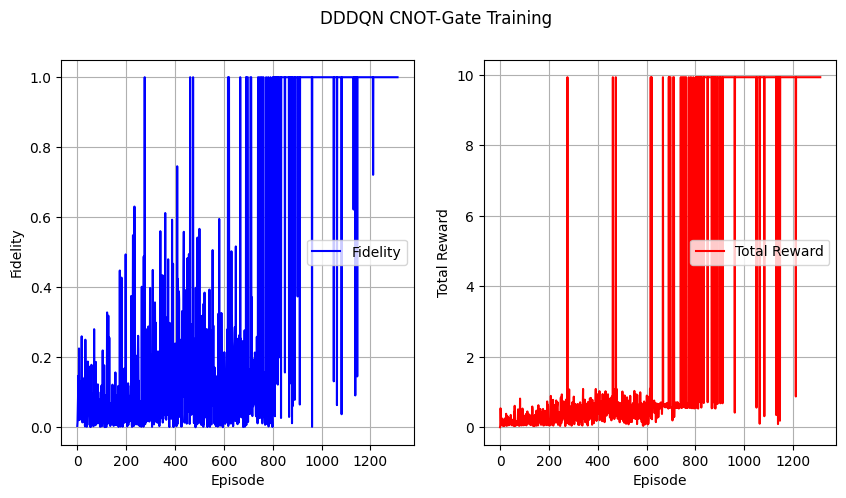

In [58]:
plt.figure(figsize=(10, 5))
plt.suptitle("DDDQN CNOT-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(cnot_dddqn["episode"], cnot_dddqn["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(
    cnot_dddqn["episode"], cnot_dddqn["total_reward"], color="red", label="Total Reward"
)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_DDDQN.png",
    dpi=300,
)
plt.show()

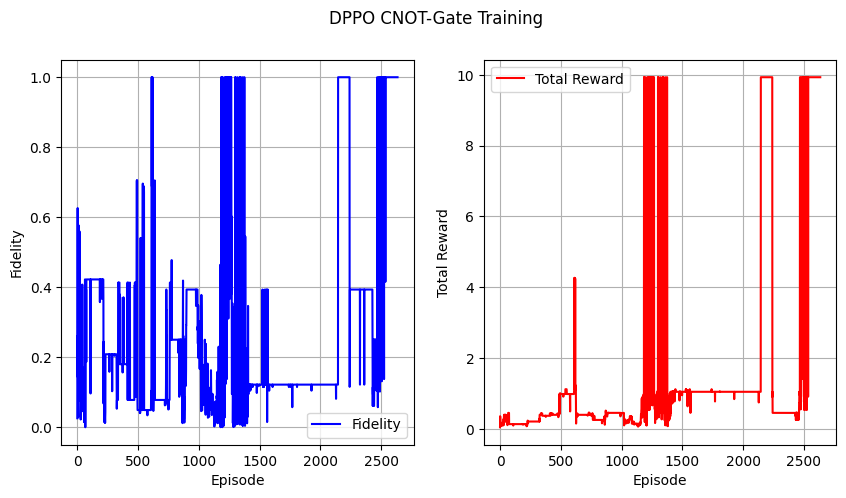

In [59]:
plt.figure(figsize=(10, 5))
plt.suptitle("DPPO CNOT-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(cnot_dppo["episode"], cnot_dppo["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(
    cnot_dppo["episode"], cnot_dppo["total_reward"], color="red", label="Total Reward"
)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_DPPO.png",
    dpi=300,
)
plt.show()

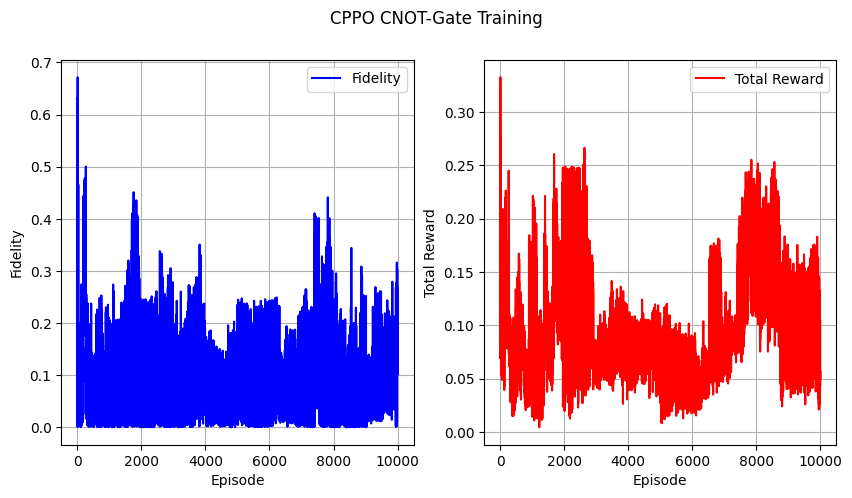

In [60]:
plt.figure(figsize=(10, 5))
plt.suptitle("CPPO CNOT-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(cnot_cppo["episode"], cnot_cppo["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(
    cnot_cppo["episode"], cnot_cppo["total_reward"], color="red", label="Total Reward"
)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_CPPO.png",
    dpi=300,
)
plt.show()

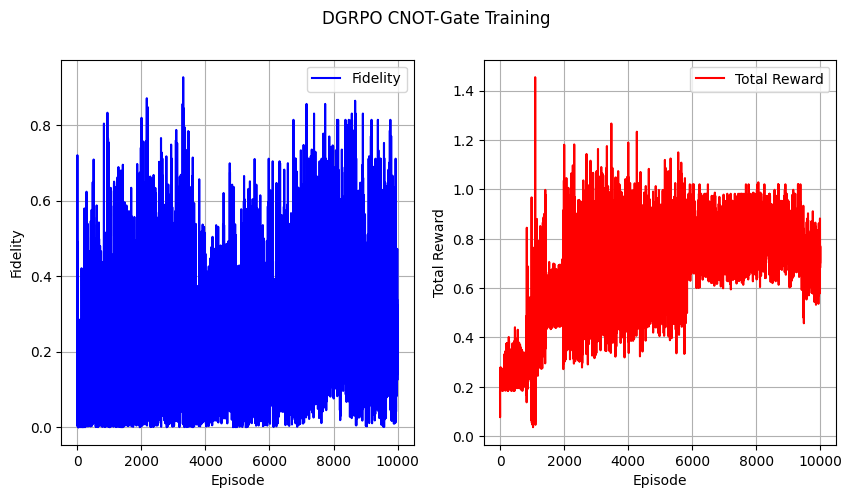

In [61]:
# for GRPO
plt.figure(figsize=(10, 5))
plt.suptitle("DGRPO CNOT-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(cnot_dgrpo["episode"], cnot_dgrpo["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(
    cnot_dgrpo["episode"], cnot_dgrpo["total_reward"], color="red", label="Total Reward"
)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_DGRPO.png",
    dpi=300,
)
plt.show()

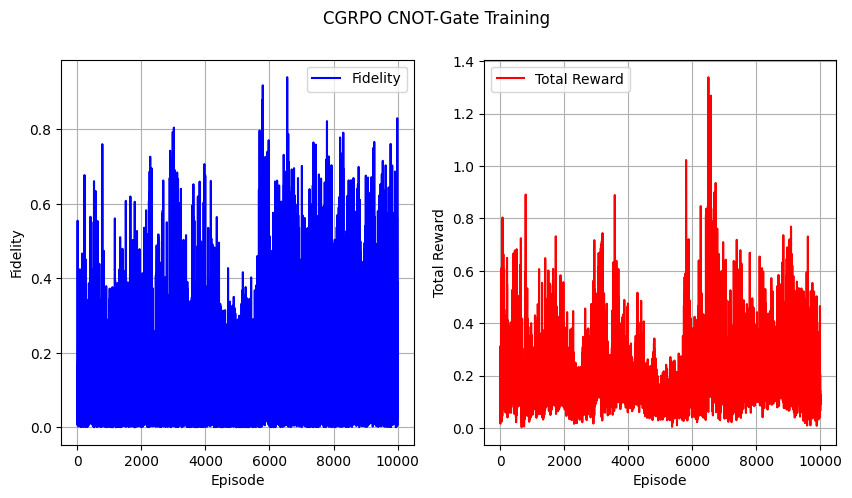

In [62]:
plt.figure(figsize=(10, 5))
plt.suptitle("CGRPO CNOT-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(cnot_cgrpo["episode"], cnot_cgrpo["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(
    cnot_cgrpo["episode"], cnot_cgrpo["total_reward"], color="red", label="Total Reward"
)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_CGRPO.png",
    dpi=300,
)
plt.show()

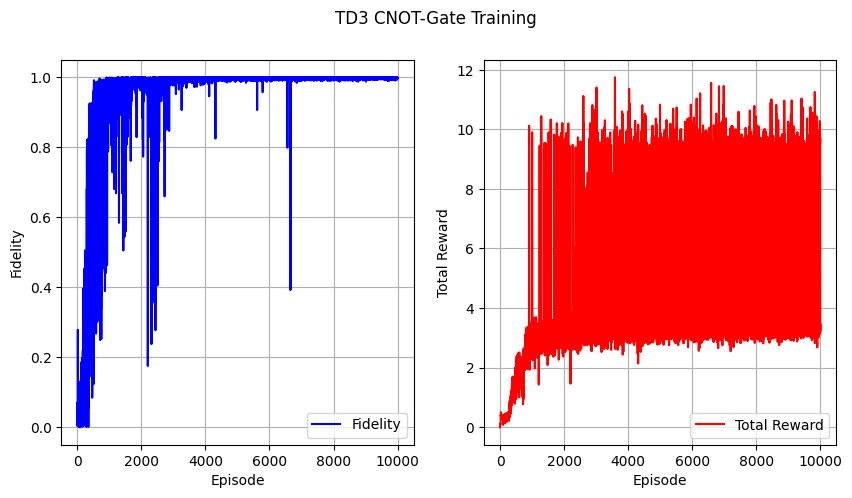

In [63]:
plt.figure(figsize=(10, 5))
plt.suptitle("TD3 CNOT-Gate Training")
plt.subplot(1, 2, 1)
plt.plot(cnot_td3["episode"], cnot_td3["fidelity"], color="blue", label="Fidelity")
plt.xlabel("Episode")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(
    cnot_td3["episode"], cnot_td3["total_reward"], color="red", label="Total Reward"
)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Fidelity_Reward_TD3.png", dpi=300
)
plt.show()

In [64]:
cnot_max = pd.DataFrame(
    {
        "Agent": ["DDDQN", "PPO-D", "PPO-C", "GRPO-D", "GRPO-C", "TD3"],
        "Max Fidelity": [
            cnot_dddqn["fidelity"].max(),
            cnot_dppo["fidelity"].max(),
            cnot_cppo["fidelity"].max(),
            cnot_dgrpo["fidelity"].max(),
            cnot_cgrpo["fidelity"].max(),
            cnot_td3["fidelity"].max(),
        ],
        "Max Log Infidelity": [
            cnot_dddqn["log_infidelity"].max(),
            cnot_dppo["log_infidelity"].max(),
            cnot_cppo["log_infidelity"].max(),
            cnot_dgrpo["log_infidelity"].max(),
            cnot_cgrpo["log_infidelity"].max(),
            cnot_td3["log_infidelity"].max(),
        ],
        "Avg Fidelity": [
            cnot_dddqn["avg_fidelity"].max(),
            cnot_dppo["avg_fidelity"].max(),
            cnot_cppo["avg_fidelity"].max(),
            cnot_dgrpo["avg_fidelity"].max(),
            cnot_cgrpo["avg_fidelity"].max(),
            cnot_td3["avg_fidelity"].max(),
        ],
    }
)
cnot_max_sorted = cnot_max.sort_values(by="Max Log Infidelity", ascending=True)
cnot_max_sorted.to_latex(
    "/home/pdconte/Desktop/DUTh_Thesis/Tables/CNOT_Gate_Max_Values.tex"
)
cnot_max_sorted

,Agent,Max Fidelity,Max Log Infidelity,Avg Fidelity
2,PPO-C,0.671743,0.483786,0.737394
3,GRPO-D,0.926997,1.136660,0.941598
4,GRPO-C,0.939936,1.221388,0.951949
0,DDDQN,0.999361,3.194187,0.999488
1,PPO-D,0.999361,3.194187,0.999488
5,TD3,0.999891,3.960929,0.999912


In [65]:
# get the 100 rolling mean of log_infidelity, for the first 100 put 0
cnot_dddqn["log_infidelity_100"] = cnot_dddqn["log_infidelity"].rolling(100).mean()
cnot_dddqn["log_infidelity_100"] = cnot_dddqn["log_infidelity_100"].fillna(0)

cnot_dppo["log_infidelity_100"] = cnot_dppo["log_infidelity"].rolling(100).mean()
cnot_dppo["log_infidelity_100"] = cnot_dppo["log_infidelity_100"].fillna(0)

cnot_cppo["log_infidelity_100"] = cnot_cppo["log_infidelity"].rolling(100).mean()
cnot_cppo["log_infidelity_100"] = cnot_cppo["log_infidelity_100"].fillna(0)

cnot_dgrpo["log_infidelity_100"] = cnot_dgrpo["log_infidelity"].rolling(100).mean()
cnot_dgrpo["log_infidelity_100"] = cnot_dgrpo["log_infidelity_100"].fillna(0)

cnot_cgrpo["log_infidelity_100"] = cnot_cgrpo["log_infidelity"].rolling(100).mean()
cnot_cgrpo["log_infidelity_100"] = cnot_cgrpo["log_infidelity_100"].fillna(0)

cnot_td3["log_infidelity_100"] = cnot_td3["log_infidelity"].rolling(100).mean()
cnot_td3["log_infidelity_100"] = cnot_td3["log_infidelity_100"].fillna(0)

In [66]:
t_min_cnot_dddqn = f"{cnot_dddqn['time_step'].idxmin()}"
t_min_cnot_dppo = f"{cnot_dppo['time_step'].idxmin()}"
t_min_cnot_cppo = f"{cnot_cppo['time_step'].idxmin()}"
t_min_cnot_dgrpo = f"{cnot_dgrpo['time_step'].idxmin()}"
t_min_cnot_cgrpo = f"{cnot_cgrpo['time_step'].idxmin()}"
t_min_cnot_td3 = f"{cnot_td3['time_step'].idxmin()}"

In [67]:
cnot_log_inf_ep_dddqn = pd.DataFrame(
    ast.literal_eval(cnot_dddqn_trajectories[t_min_cnot_dddqn][3])
)
cnot_log_inf_ep_dppo = pd.DataFrame(
    ast.literal_eval(cnot_dppo_trajectories[t_min_cnot_dppo][3])
)
cnot_log_inf_ep_cppo = pd.DataFrame(
    ast.literal_eval(cnot_cppo_trajectories[t_min_cnot_cppo][3])
)
cnot_log_inf_ep_dgrpo = pd.DataFrame(
    ast.literal_eval(cnot_dgrpo_trajectories[t_min_cnot_dgrpo][3])
)
cnot_log_inf_ep_cgrpo = pd.DataFrame(
    ast.literal_eval(cnot_cgrpo_trajectories[t_min_cnot_cgrpo][3])
)
cnot_log_inf_ep_td3 = pd.DataFrame(
    ast.literal_eval(cnot_td3_trajectories[t_min_cnot_td3][3])
)

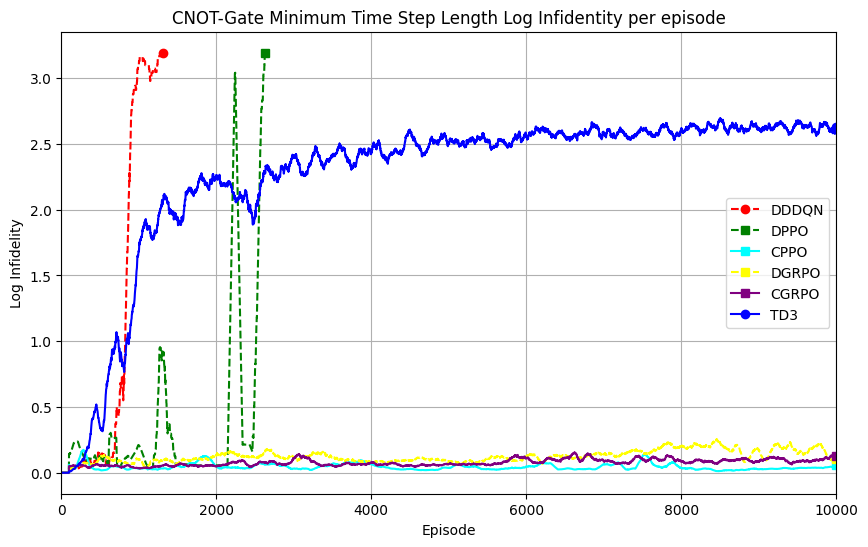

In [68]:
cut = 10000
plt.figure(figsize=(10, 6))
plt.plot(
    cnot_dddqn["episode"],
    cnot_dddqn["log_infidelity_100"],
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    cnot_dppo["episode"][0:cut],
    cnot_dppo["log_infidelity_100"][0:cut],
    label="DPPO",
    color="green",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    cnot_cppo["episode"][0:cut],
    cnot_cppo["log_infidelity_100"][0:cut],
    label="CPPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    cnot_dgrpo["episode"][0:cut],
    cnot_dgrpo["log_infidelity_100"][0:cut],
    label="DGRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    cnot_cgrpo["episode"][0:cut],
    cnot_cgrpo["log_infidelity_100"][0:cut],
    label="CGRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    cnot_td3["episode"],
    cnot_td3["log_infidelity_100"],
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.xlabel("Episode")
plt.ylabel("Log Infidelity")
plt.title("CNOT-Gate Minimum Time Step Length Log Infidentity per episode")
plt.legend()
plt.xlim(0, cut)
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_gate_Minimum_Time_Step_Length_Log_Infidelity",
    dpi=300,
)
plt.show()

In [69]:
def plot_control_pulse_two_qubit(
    control_rabi,
    control_detuning,
    target_rabi,
    target_detuning,
    coupling_strength,
    gate,
    agent_type,
    smoothing_method="none",
    **kwargs,
):

    num_steps = len(control_rabi)
    assert (
        len(control_detuning) == num_steps
        and len(target_rabi) == num_steps
        and len(target_detuning) == num_steps
    ), "All control and target arrays must have the same length."

    # Handle coupling_strength: if scalar, convert to an array; if array, check length.
    if np.isscalar(coupling_strength):
        coupling_strength = np.full(num_steps, coupling_strength)
    else:
        assert (
            len(coupling_strength) == num_steps
        ), "Coupling strength array must have the same length as the qubit pulse arrays."

    t_normalized = np.linspace(0, 1, num_steps)

    # Normalize arrays
    control_rabi_normalized = _normalize_array(control_rabi, "Control Rabi")
    control_detuning_normalized = _normalize_array(control_detuning, "Control Detuning")
    target_rabi_normalized = _normalize_array(target_rabi, "Target Rabi")
    target_detuning_normalized = _normalize_array(target_detuning, "Target Detuning")
    coupling_strength_normalized = _normalize_array(
        coupling_strength, "Coupling Strength"
    )

    # Apply smoothing if requested
    if smoothing_method == "cubic_spline":
        control_rabi_normalized, t_normalized = _smooth_array(
            control_rabi_normalized, smoothing_method, t_normalized, **kwargs
        )
        control_detuning_normalized, t_normalized = _smooth_array(
            control_detuning_normalized, smoothing_method, t_normalized, **kwargs
        )
        target_rabi_normalized, t_normalized = _smooth_array(
            target_rabi_normalized, smoothing_method, t_normalized, **kwargs
        )
        target_detuning_normalized, t_normalized = _smooth_array(
            target_detuning_normalized, smoothing_method, t_normalized, **kwargs
        )
        coupling_strength_normalized, t_normalized = _smooth_array(
            coupling_strength_normalized, smoothing_method, t_normalized, **kwargs
        )
    else:
        control_rabi_normalized = _smooth_array(
            control_rabi_normalized, smoothing_method, **kwargs
        )
        control_detuning_normalized = _smooth_array(
            control_detuning_normalized, smoothing_method, **kwargs
        )
        target_rabi_normalized = _smooth_array(
            target_rabi_normalized, smoothing_method, **kwargs
        )
        target_detuning_normalized = _smooth_array(
            target_detuning_normalized, smoothing_method, **kwargs
        )
        coupling_strength_normalized = _smooth_array(
            coupling_strength_normalized, smoothing_method, **kwargs
        )

    # Create three subplots: one for control qubit, one for target qubit, and one for coupling strength
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    # Plot for Control Qubit
    axs[0].plot(
        t_normalized,
        control_rabi_normalized,
        label=r"$\frac{\Omega_{c}}{\Omega_{c,\mathrm{max}}}$",
        color="blue",
        linestyle="--",
        drawstyle="steps-post",
    )
    axs[0].plot(
        t_normalized,
        control_detuning_normalized,
        label=r"$\frac{\Delta_{c}}{\Delta_{c,\mathrm{max}}}$",
        color="red",
        linestyle="--",
        drawstyle="steps-post",
    )
    axs[0].set_xlabel(r"$\frac{t}{T}$", fontsize=14)
    axs[0].set_ylabel("Normalized Pulses", fontsize=14)
    axs[0].set_title("Control Qubit Pulses", fontsize=16)
    axs[0].legend(fontsize=12)
    axs[0].grid(True)

    # Plot for Target Qubit
    axs[1].plot(
        t_normalized,
        target_rabi_normalized,
        label=r"$\frac{\Omega_{t}}{\Omega_{t,\mathrm{max}}}$",
        color="green",
        linestyle="--",
        drawstyle="steps-post",
    )
    axs[1].plot(
        t_normalized,
        target_detuning_normalized,
        label=r"$\frac{\Delta_{t}}{\Delta_{t,\mathrm{max}}}$",
        color="orange",
        linestyle="--",
        drawstyle="steps-post",
    )
    axs[1].set_xlabel(r"$\frac{t}{T}$", fontsize=14)
    axs[1].set_ylabel("Normalized Pulses", fontsize=14)
    axs[1].set_title("Target Qubit Pulses", fontsize=16)
    axs[1].legend(fontsize=12)
    axs[1].grid(True)

    # Plot for Coupling Strength
    axs[2].plot(
        t_normalized,
        coupling_strength_normalized,
        label=r"$\frac{J_{zx}}{J_{zx,\mathrm{max}}}$",
        color="purple",
        linestyle="-",
        drawstyle="steps-post",
    )
    axs[2].set_xlabel(r"$\frac{t}{T}$", fontsize=14)
    axs[2].set_ylabel("Normalized Coupling", fontsize=14)
    axs[2].set_title("Coupling Strength (Jzx)", fontsize=16)
    axs[2].legend(fontsize=12)
    axs[2].grid(True)

    # Overall title including coupling strength information
    fig.suptitle(
        f"{agent_type} {gate} Gate Control Pulses",
        fontsize=18,
    )
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(
        f"/home/pdconte/Desktop/DUTh_Thesis/Plots/{gate}_Gate_Control_{agent_type}.png",
        dpi=300,
    )
    plt.show()

In [70]:
# Apply the function to the column
cnot_dddqn_pulse = ast.literal_eval(cnot_dddqn_trajectories[t_min_cnot_dddqn][6])
cnot_dddqn_pulse = {
    "omega1": [d["omega1"] for d in cnot_dddqn_pulse],
    "delta1": [d["delta1"] for d in cnot_dddqn_pulse],
    "omega2": [d["omega2"] for d in cnot_dddqn_pulse],
    "delta2": [d["delta2"] for d in cnot_dddqn_pulse],
    "coupling_strength_zx": [d["coupling_strength_zx"] for d in cnot_dddqn_pulse],
}

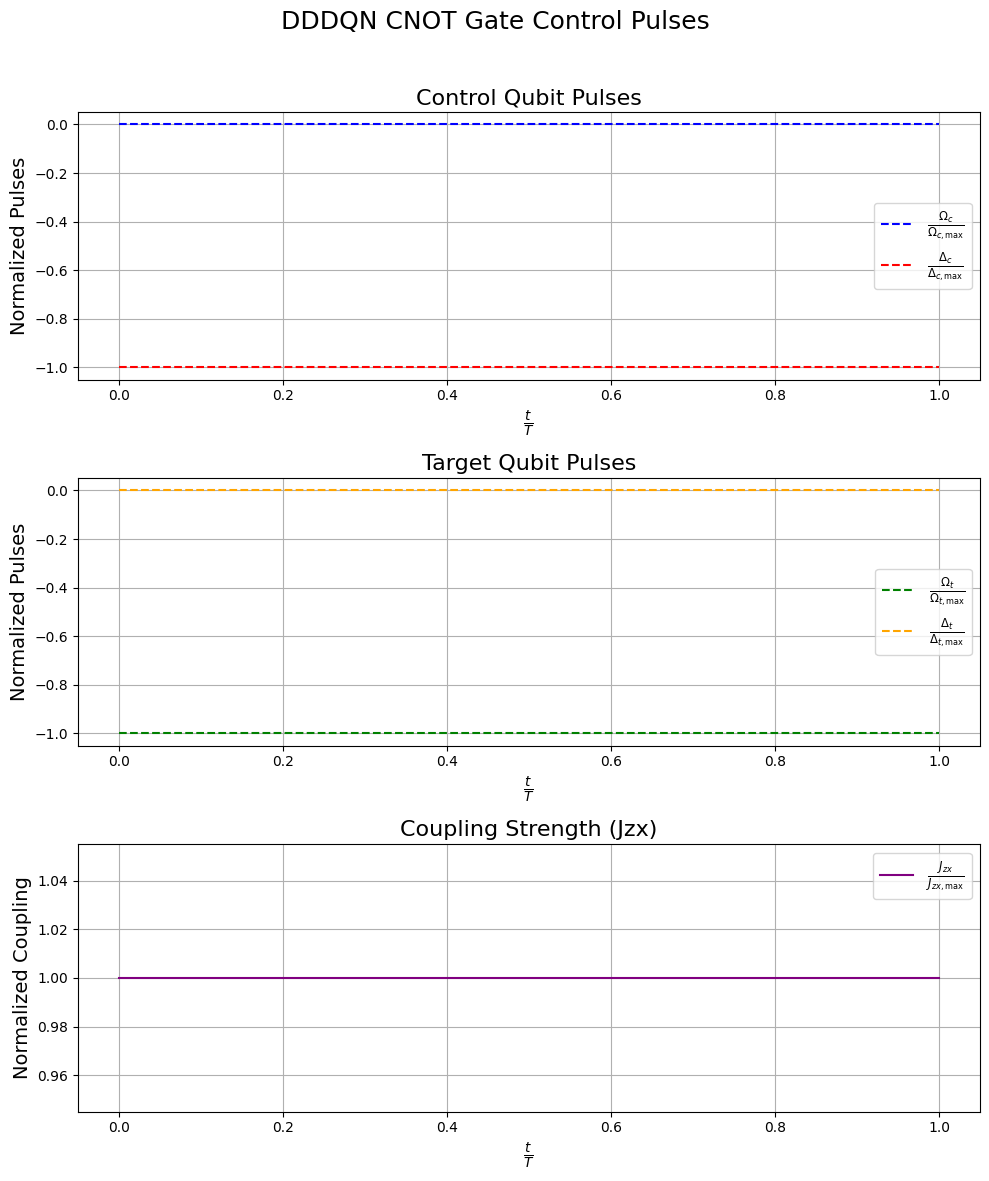

In [71]:
plot_control_pulse_two_qubit(
    cnot_dddqn_pulse["omega1"],
    cnot_dddqn_pulse["delta1"],
    cnot_dddqn_pulse["omega2"],
    cnot_dddqn_pulse["delta2"],
    cnot_dddqn_pulse["coupling_strength_zx"],
    "CNOT",
    "DDDQN",
    smoothing_method="gaussian",
)

In [72]:
# Apply the function to the column
cnot_dppo_pulse = ast.literal_eval(cnot_dppo_trajectories[t_min_cnot_dppo][6])
cnot_dppo_pulse = {
    "omega1": [d["omega1"] for d in cnot_dppo_pulse],
    "delta1": [d["delta1"] for d in cnot_dppo_pulse],
    "omega2": [d["omega2"] for d in cnot_dppo_pulse],
    "delta2": [d["delta2"] for d in cnot_dppo_pulse],
    "coupling_strength_zx": [d["coupling_strength_zx"] for d in cnot_dppo_pulse],
}

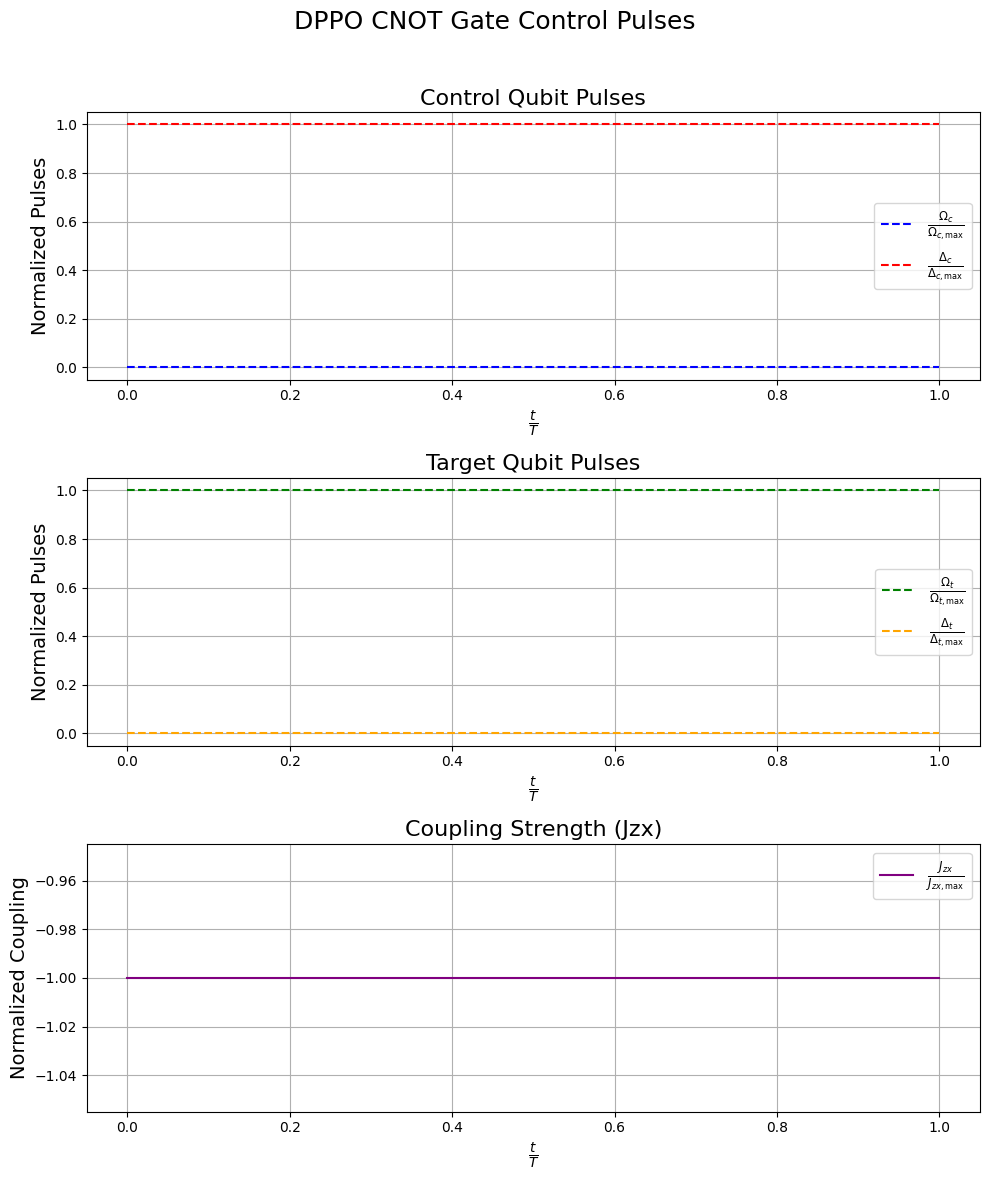

In [73]:
plot_control_pulse_two_qubit(
    cnot_dppo_pulse["omega1"],
    cnot_dppo_pulse["delta1"],
    cnot_dppo_pulse["omega2"],
    cnot_dppo_pulse["delta2"],
    cnot_dppo_pulse["coupling_strength_zx"],
    "CNOT",
    "DPPO",
    smoothing_method="gaussian",
)

In [74]:
# Apply the function to the column
cnot_cppo_pulse = ast.literal_eval(cnot_dppo_trajectories[t_min_cnot_cppo][6])
cnot_cppo_pulse = {
    "omega1": [d["omega1"] for d in cnot_cppo_pulse],
    "delta1": [d["delta1"] for d in cnot_cppo_pulse],
    "omega2": [d["omega2"] for d in cnot_cppo_pulse],
    "delta2": [d["delta2"] for d in cnot_cppo_pulse],
    "coupling_strength_zx": [d["coupling_strength_zx"] for d in cnot_cppo_pulse],
}

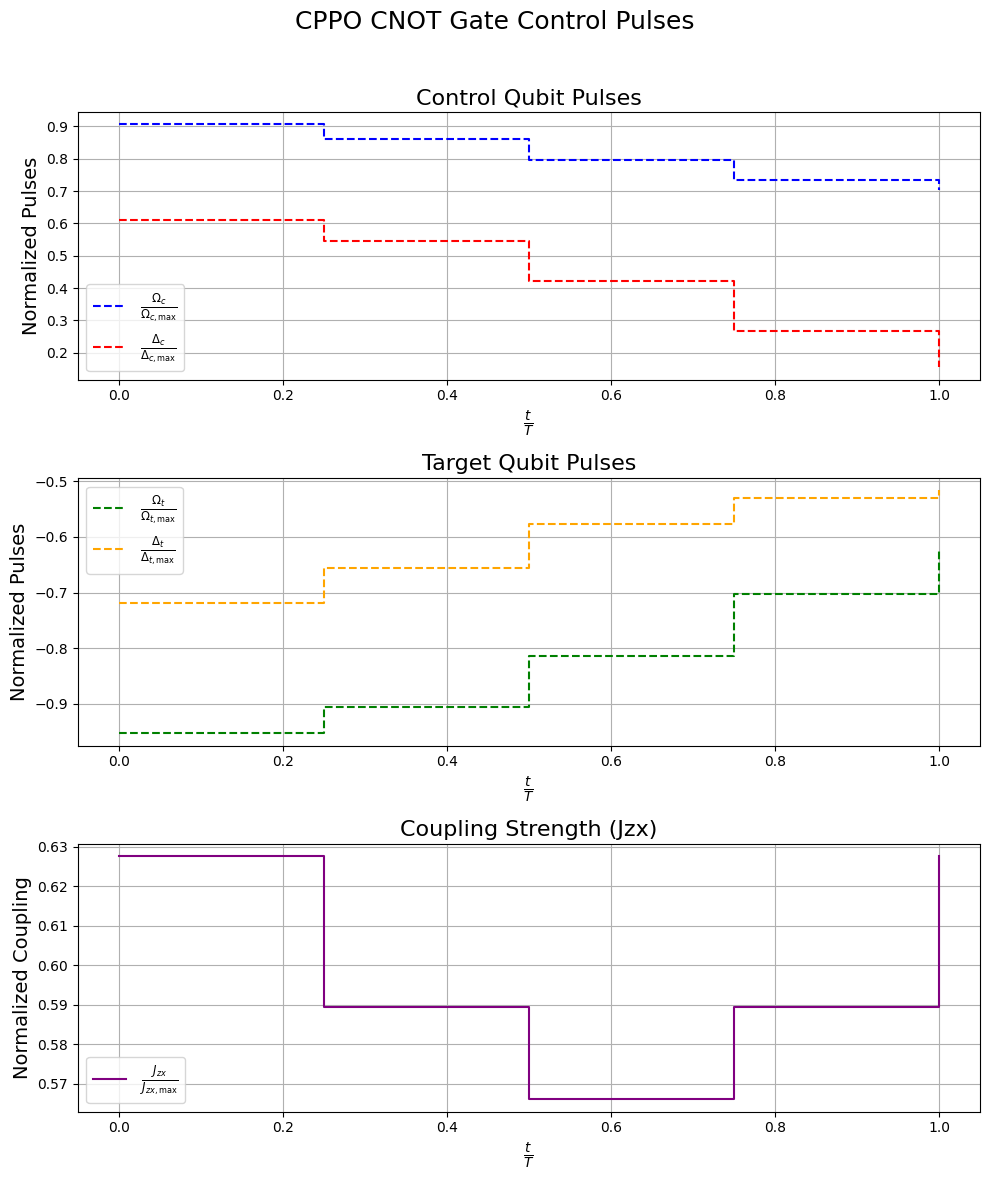

In [75]:
plot_control_pulse_two_qubit(
    cnot_cppo_pulse["omega1"],
    cnot_cppo_pulse["delta1"],
    cnot_cppo_pulse["omega2"],
    cnot_cppo_pulse["delta2"],
    cnot_cppo_pulse["coupling_strength_zx"],
    "CNOT",
    "CPPO",
    smoothing_method="gaussian",
)

In [76]:
# Apply the function to the column
cnot_dgrpo_pulse = ast.literal_eval(cnot_dgrpo_trajectories[t_min_cnot_dgrpo][6])
cnot_dgrpo_pulse = {
    "omega1": [d["omega1"] for d in cnot_dgrpo_pulse],
    "delta1": [d["delta1"] for d in cnot_dgrpo_pulse],
    "omega2": [d["omega2"] for d in cnot_dgrpo_pulse],
    "delta2": [d["delta2"] for d in cnot_dgrpo_pulse],
    "coupling_strength_zx": [d["coupling_strength_zx"] for d in cnot_dgrpo_pulse],
}

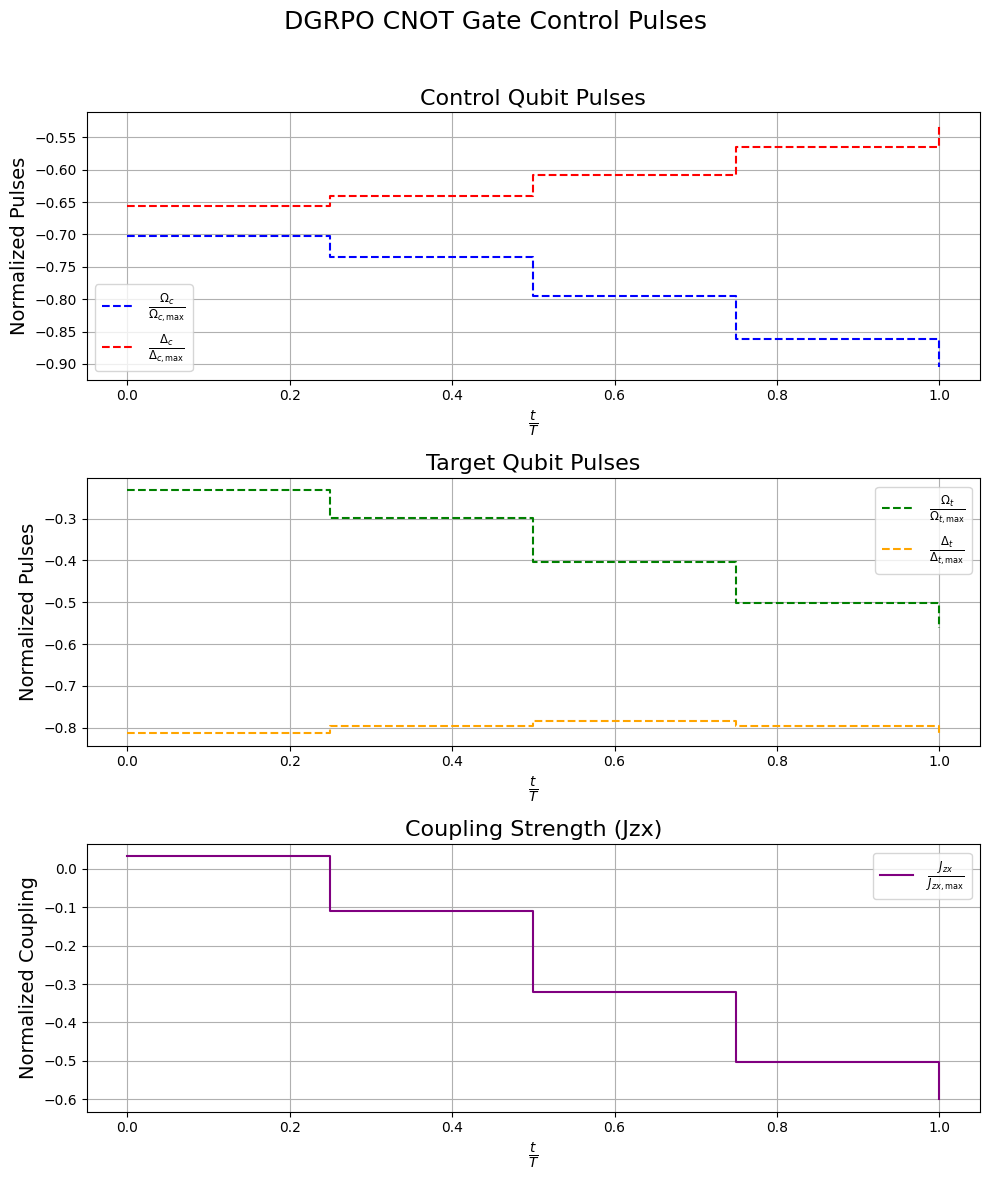

In [77]:
plot_control_pulse_two_qubit(
    cnot_dgrpo_pulse["omega1"],
    cnot_dgrpo_pulse["delta1"],
    cnot_dgrpo_pulse["omega2"],
    cnot_dgrpo_pulse["delta2"],
    cnot_dgrpo_pulse["coupling_strength_zx"],
    "CNOT",
    "DGRPO",
    smoothing_method="gaussian",
)

In [78]:
cnot_cgrpo_pulse = ast.literal_eval(cnot_cgrpo_trajectories[t_min_cnot_cgrpo][6])
cnot_cgrpo_pulse = {
    "omega1": [d["omega1"] for d in cnot_cgrpo_pulse],
    "delta1": [d["delta1"] for d in cnot_cgrpo_pulse],
    "omega2": [d["omega2"] for d in cnot_cgrpo_pulse],
    "delta2": [d["delta2"] for d in cnot_cgrpo_pulse],
    "coupling_strength_zx": [d["coupling_strength_zx"] for d in cnot_cgrpo_pulse],
}

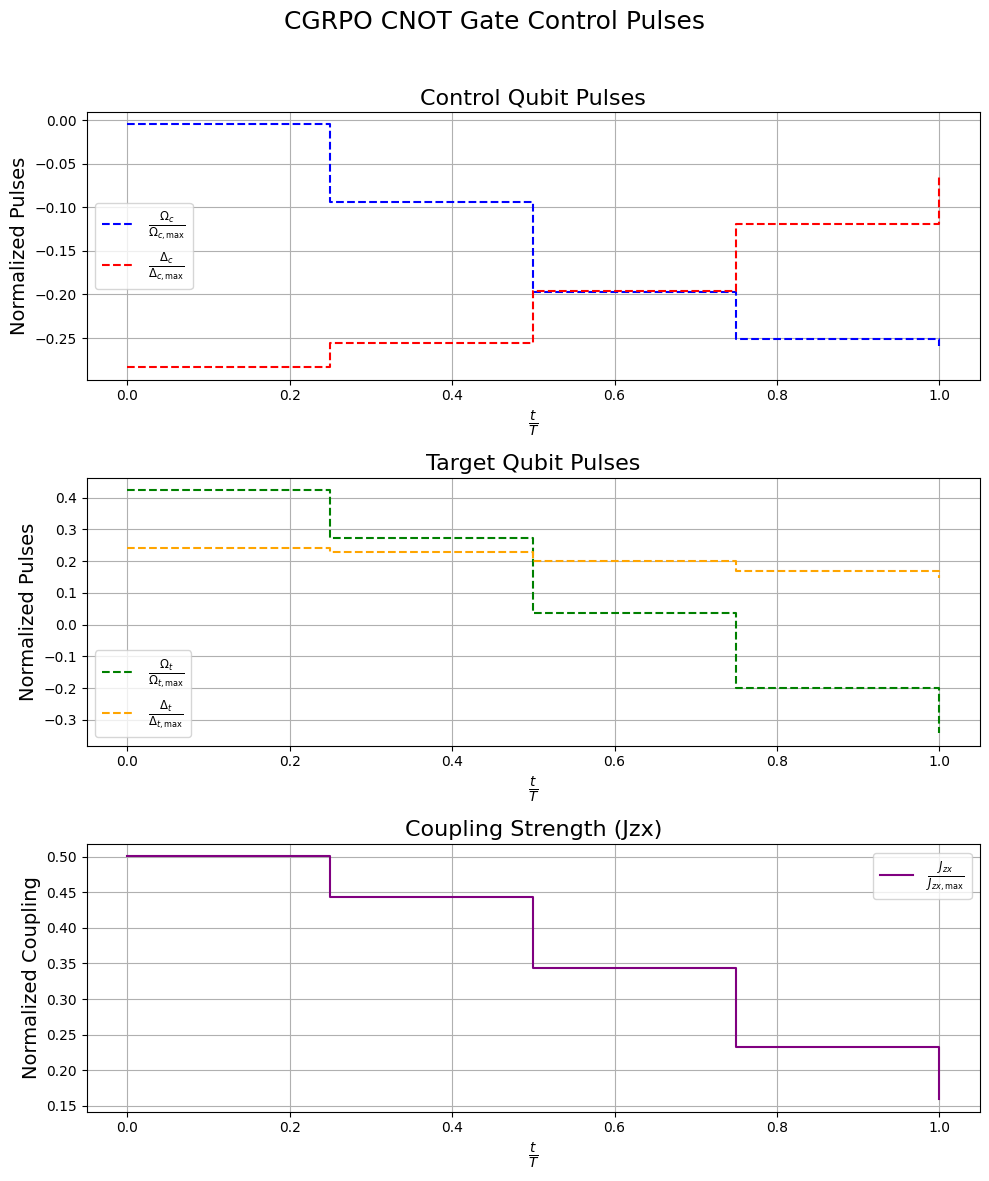

In [79]:
plot_control_pulse_two_qubit(
    cnot_cgrpo_pulse["omega1"],
    cnot_cgrpo_pulse["delta1"],
    cnot_cgrpo_pulse["omega2"],
    cnot_cgrpo_pulse["delta2"],
    cnot_cgrpo_pulse["coupling_strength_zx"],
    "CNOT",
    "CGRPO",
    smoothing_method="gaussian",
)

In [80]:
cnot_td3_pulse = ast.literal_eval(cnot_td3_trajectories[t_min_cnot_td3][6])
cnot_td3_pulse = {
    "omega1": [d["omega1"] for d in cnot_td3_pulse],
    "delta1": [d["delta1"] for d in cnot_td3_pulse],
    "omega2": [d["omega2"] for d in cnot_td3_pulse],
    "delta2": [d["delta2"] for d in cnot_td3_pulse],
    "coupling_strength_zx": [d["coupling_strength_zx"] for d in cnot_td3_pulse],
}

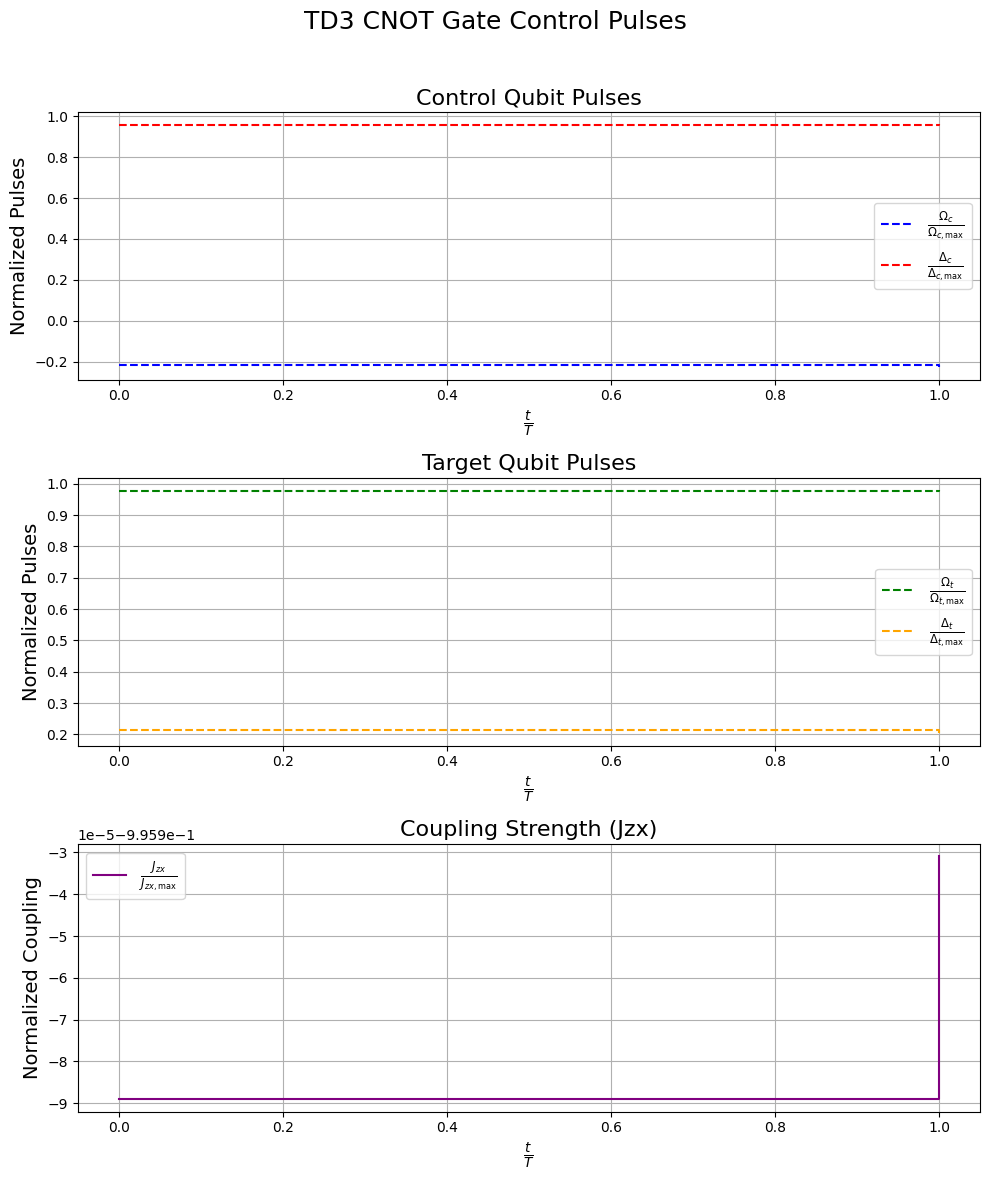

In [81]:
plot_control_pulse_two_qubit(
    cnot_td3_pulse["omega1"],
    cnot_td3_pulse["delta1"],
    cnot_td3_pulse["omega2"],
    cnot_td3_pulse["delta2"],
    cnot_td3_pulse["coupling_strength_zx"],
    "CNOT",
    "TD3",
    smoothing_method="gaussian",
    
)

# Comparison of Control Pulses

In [82]:
# import from ./Data/ the crab and grape methods for the gates

h_grape_adam = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_h_adam.csv')
h_grape_lbfgs = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_h_lbfgs.csv')
h_crab = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/crab_h.csv')

t_grape_adam = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_t_adam.csv')
t_grape_lbfgs = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_t_lbfgs.csv')
t_crab = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/crab_t.csv')

cnot_grape_adam = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_cnot_adam.csv')
cnot_grape_lbfgs = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/grape_cnot_lbfgs.csv')
cnot_crab = pd.read_csv('/home/pdconte/Desktop/DUTh_Thesis/Data/crab_cnot.csv')

In [83]:
h_grape_adam.isin([-np.inf]).sum()

Unnamed: 0           0
loss_grape_h_adam    0
fid_grape_h_adam     0
inf_grape_h_adam     0
dtype: int64

In [84]:
h_grape_lbfgs.isin([-np.inf]).sum()

Unnamed: 0             0
loss_grape_h_lbfgs     0
fid_grape_h_lbfgs      0
inf_grape_h_lbfgs     63
dtype: int64

In [85]:
h_grape_lbfgs.replace([-np.inf], np.nan, inplace=True)
h_grape_lbfgs.ffill(inplace=True)

In [86]:
h_crab.isin([-np.inf]).sum()

Unnamed: 0       0
loss_crab_h      0
fid_crab_h       0
inf_crab_h     165
dtype: int64

In [87]:
h_crab.replace([-np.inf], np.nan, inplace=True)
h_crab.ffill(inplace=True)

In [88]:
h_grape_adam["inf_grape_h_adam_100"] = h_grape_adam["inf_grape_h_adam"].rolling(100).mean()
h_grape_lbfgs["inf_grape_h_lbfgs_100"] = h_grape_lbfgs["inf_grape_h_lbfgs"].rolling(100).mean()
h_crab["inf_crab_h_100"] = h_crab["inf_crab_h"].rolling(100).mean()

In [89]:
h_grape_adam["inf_grape_h_adam_100"] = h_grape_adam["inf_grape_h_adam_100"].fillna(0)
h_grape_lbfgs["inf_grape_h_lbfgs_100"] = h_grape_lbfgs["inf_grape_h_lbfgs_100"].fillna(
    0
)
h_crab["inf_crab_h_100"] = h_crab["inf_crab_h_100"].fillna(0)

In [90]:
h_grape_adam.rename(
    columns={"inf_grape_h_adam_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
h_grape_lbfgs.rename(
    columns={"inf_grape_h_lbfgs_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
h_crab.rename(
    columns={"inf_crab_h_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)

In [91]:
h_grape_adam["log_infidelity_100"] = -h_grape_adam["log_infidelity_100"]
h_grape_lbfgs["log_infidelity_100"] = -h_grape_lbfgs["log_infidelity_100"]
h_crab["log_infidelity_100"] = -h_crab["log_infidelity_100"]

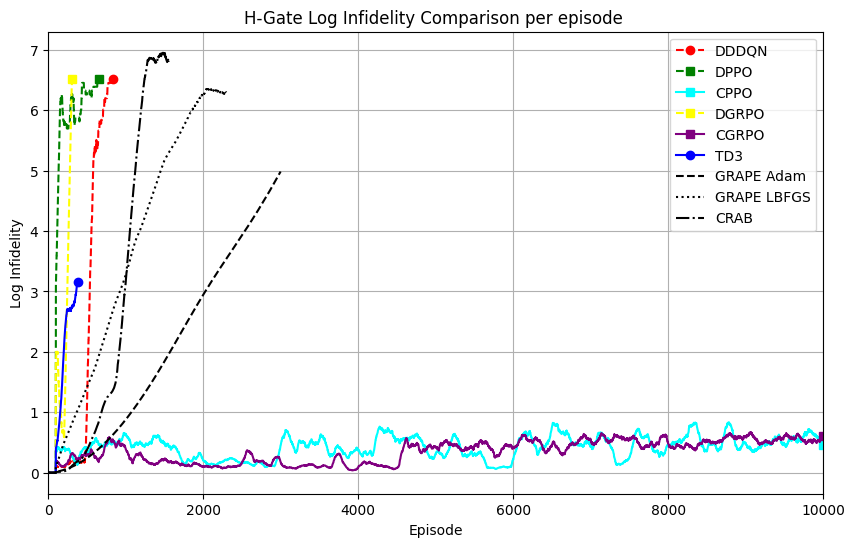

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(
    h_dddqn["episode"],
    h_dddqn["log_infidelity_100"],
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    h_dppo["episode"],
    h_dppo["log_infidelity_100"],
    label="DPPO",
    color="green",
    linestyle="dashed",
    marker = "s",
    markevery = [-1]
)
plt.plot(
    h_cppo["episode"],
    h_cppo["log_infidelity_100"],
    label="CPPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    h_dgrpo["episode"],
    h_dgrpo["log_infidelity_100"],
    label="DGRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    h_cgrpo["episode"],
    h_cgrpo["log_infidelity_100"],
    label="CGRPO",
    color="purple",
    marker = 's',
    markevery = [-1]
)
plt.plot(
    h_td3["episode"], 
    h_td3["log_infidelity_100"], 
    label="TD3", 
    color="blue",
    marker = 'o',
    markevery = [-1]
)
plt.plot(
    h_grape_adam["episode"],
    h_grape_adam["log_infidelity_100"],
    label="GRAPE Adam",
    color="black",
    linestyle="dashed",
)
plt.plot(
    h_grape_lbfgs["episode"],
    h_grape_lbfgs["log_infidelity_100"],
    label="GRAPE LBFGS",
    color="black",
    linestyle="dotted",
)
plt.plot(
    h_crab["episode"],
    h_crab["log_infidelity_100"],
    label="CRAB",
    color="black",
    linestyle="dashdot",
)
plt.xlabel("Episode")
plt.xlim(0, cut)
plt.ylabel("Log Infidelity")
plt.title("H-Gate Log Infidelity Comparison per episode ")
plt.legend(loc='upper right')
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/H_Gate_Log_Infidelity_Comparison.png",
    dpi=300,
)
plt.show()

In [93]:
t_grape_adam.isin([-np.inf]).sum()

Unnamed: 0             0
loss_grape_t_adam      0
fid_grape_t_adam       0
inf_grape_t_adam     355
dtype: int64

In [94]:
t_grape_adam.replace([-np.inf], np.nan, inplace=True)
t_grape_adam.ffill(inplace=True)

In [95]:
t_grape_lbfgs.isin([-np.inf]).sum()

Unnamed: 0            0
loss_grape_t_lbfgs    0
fid_grape_t_lbfgs     0
inf_grape_t_lbfgs     0
dtype: int64

In [96]:
t_crab.isin([-np.inf]).sum()

Unnamed: 0       0
loss_crab_t      0
fid_crab_t       0
inf_crab_t     113
dtype: int64

In [97]:
t_crab.replace([-np.inf], np.nan, inplace=True)
t_crab.ffill(inplace=True)

In [98]:
t_grape_adam["inf_grape_t_adam_100"] = t_grape_adam["inf_grape_t_adam"].rolling(100).mean()
t_grape_lbfgs["inf_grape_t_lbfgs_100"] = t_grape_lbfgs["inf_grape_t_lbfgs"].rolling(100).mean()
t_crab["inf_crab_t_100"] = t_crab["inf_crab_t"].rolling(100).mean()

In [99]:
t_grape_adam["inf_grape_t_adam_100"] = t_grape_adam["inf_grape_t_adam_100"].fillna(0)
t_grape_lbfgs["inf_grape_t_lbfgs_100"] = t_grape_lbfgs["inf_grape_t_lbfgs_100"].fillna(
    0
)
t_crab["inf_crab_t_100"] = t_crab["inf_crab_t_100"].fillna(0)

In [100]:
t_grape_adam.rename(
    columns={"inf_grape_t_adam_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
t_grape_lbfgs.rename(
    columns={"inf_grape_t_lbfgs_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
t_crab.rename(
    columns={"inf_crab_t_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)


In [101]:
t_grape_adam["log_infidelity_100"] = -t_grape_adam["log_infidelity_100"]
t_grape_lbfgs["log_infidelity_100"] = -t_grape_lbfgs["log_infidelity_100"]
t_crab["log_infidelity_100"] = -t_crab["log_infidelity_100"]

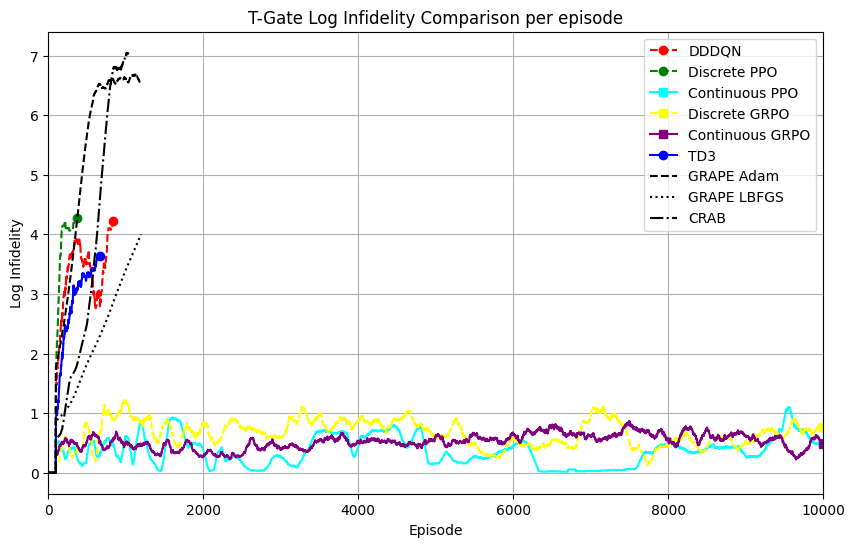

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(
    t_dddqn["episode"],
    t_dddqn["log_infidelity_100"],
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    t_dppo["episode"],
    t_dppo["log_infidelity_100"],
    label="Discrete PPO",
    color="green",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    t_cppo["episode"],
    t_cppo["log_infidelity_100"],
    label="Continuous PPO",
    color="cyan",
    marker = 's',
    markevery=[-1],

)
plt.plot(
    t_dgrpo["episode"],
    t_dgrpo["log_infidelity_100"],
    label="Discrete GRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    t_cgrpo["episode"],
    t_cgrpo["log_infidelity_100"],
    label="Continuous GRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    t_td3["episode"],
    t_td3["log_infidelity_100"],
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.plot(
    t_grape_adam["episode"],
    t_grape_adam["log_infidelity_100"],
    label="GRAPE Adam",
    color="black",
    linestyle="dashed",
)
plt.plot(
    t_grape_lbfgs["episode"],
    t_grape_lbfgs["log_infidelity_100"],
    label="GRAPE LBFGS",
    color="black",
    linestyle="dotted",
)
plt.plot(
    t_crab["episode"],
    t_crab["log_infidelity_100"],
    label="CRAB",
    color="black",
    linestyle="dashdot",
)

plt.xlabel("Episode")
plt.ylabel("Log Infidelity")
plt.xlim(0, cut)
plt.title("T-Gate Log Infidelity Comparison per episode")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/T_Gate_Log_Infidelity_Comparison.png",
    dpi=300,
)
plt.show()

In [103]:
cnot_grape_adam.isin([-np.inf]).sum()

Unnamed: 0              0
loss_grape_cnot_adam    0
fid_grape_cnot_adam     0
inf_grape_cnot_adam     0
dtype: int64

In [104]:
cnot_grape_lbfgs.isin([-np.inf]).sum()

Unnamed: 0               0
loss_grape_cnot_lbfgs    0
fid_grape_cnot_lbfgs     0
inf_grape_cnot_lbfgs     0
dtype: int64

In [105]:
cnot_crab.isin([-np.inf]).sum()

Unnamed: 0          0
loss_crab_cnot      0
fid_crab_cnot       0
inf_crab_cnot     425
dtype: int64

In [106]:
cnot_crab.replace([-np.inf], np.nan, inplace=True)
cnot_crab.ffill(inplace=True)

In [107]:
cnot_grape_adam["inf_grape_cnot_adam_100"] = (
    cnot_grape_adam["inf_grape_cnot_adam"].rolling(100).mean()
)
cnot_grape_lbfgs["inf_grape_cnot_lbfgs_100"] = (
    cnot_grape_lbfgs["inf_grape_cnot_lbfgs"].rolling(100).mean()
)
cnot_crab["inf_crab_cnot_100"] = cnot_crab["inf_crab_cnot"].rolling(100).mean()

In [108]:
cnot_grape_adam["inf_grape_cnot_adam_100"] = cnot_grape_adam["inf_grape_cnot_adam_100"].fillna(0)
cnot_grape_lbfgs["inf_grape_cnot_lbfgs_100"] = cnot_grape_lbfgs["inf_grape_cnot_lbfgs_100"].fillna(
    0
)
cnot_crab["inf_crab_cnot_100"] = cnot_crab["inf_crab_cnot_100"].fillna(0)

In [109]:
cnot_grape_adam.rename(
    columns={"inf_grape_cnot_adam_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
cnot_grape_lbfgs.rename(
    columns={"inf_grape_cnot_lbfgs_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)
cnot_crab.rename(
    columns={"inf_crab_cnot_100": "log_infidelity_100", "Unnamed: 0": "episode"},
    inplace=True,
)

In [110]:
cnot_grape_adam["log_infidelity_100"] = -cnot_grape_adam["log_infidelity_100"]
cnot_grape_lbfgs["log_infidelity_100"] = -cnot_grape_lbfgs["log_infidelity_100"]
cnot_crab["log_infidelity_100"] = -cnot_crab["log_infidelity_100"]

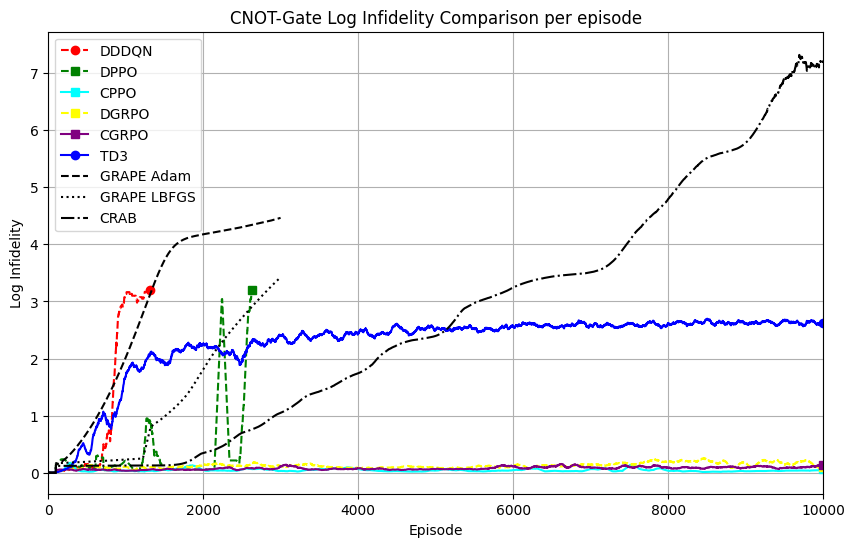

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(
    cnot_dddqn["episode"],
    cnot_dddqn["log_infidelity_100"],
    label="DDDQN",
    color="red",
    linestyle="dashed",
    marker="o",
    markevery=[-1],
)
plt.plot(
    cnot_dppo["episode"],
    cnot_dppo["log_infidelity_100"],
    label="DPPO",
    color="green",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    cnot_cppo["episode"],
    cnot_cppo["log_infidelity_100"],
    label="CPPO",
    color="cyan",
    marker="s",
    markevery=[-1],
)
plt.plot(
    cnot_dgrpo["episode"],
    cnot_dgrpo["log_infidelity_100"],
    label="DGRPO",
    color="yellow",
    linestyle="dashed",
    marker="s",
    markevery=[-1],
)
plt.plot(
    cnot_cgrpo["episode"],
    cnot_cgrpo["log_infidelity_100"],
    label="CGRPO",
    color="purple",
    marker="s",
    markevery=[-1],
)
plt.plot(
    cnot_td3["episode"],
    cnot_td3["log_infidelity_100"],
    label="TD3",
    color="blue",
    marker="o",
    markevery=[-1],
)
plt.plot(
    cnot_grape_adam["episode"],
    cnot_grape_adam["log_infidelity_100"],
    label="GRAPE Adam",
    color="black",
    linestyle="dashed",
)
plt.plot(
    cnot_grape_lbfgs["episode"],
    cnot_grape_lbfgs["log_infidelity_100"],
    label="GRAPE LBFGS",
    color="black",
    linestyle="dotted",
)
plt.plot(
    cnot_crab["episode"],
    cnot_crab["log_infidelity_100"],
    label="CRAB",
    color="black",
    linestyle="dashdot",
)

plt.xlabel("Episode")
plt.xlim(0, 10000)
plt.ylabel("Log Infidelity")
plt.title("CNOT-Gate Log Infidelity Comparison per episode")
plt.legend()
plt.grid()
plt.savefig(
    "/home/pdconte/Desktop/DUTh_Thesis/Plots/CNOT_Gate_Log_Infidelity_Comparison.png",
    dpi=300,
)
plt.show()